[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/blob/main/06-Beyond-the-Basics-of-ggplot2.ipynb)



# <a name="06-title"><font size="6">Module 06: Beyond the Basics of `ggplot2`</font></a>

---

# <a name="intro-ggplot">The `ggplot2` Package</a>

---

![The ggplot2 logo](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Ggplot2_hex_logo.svg/208px-Ggplot2_hex_logo.svg.png)


In this module we continue working with  <font color="dodgerblue">**ggplot2**</font> (Wickham 2016; Wickham et al. 2023), a powerful and intuitive package for producing data visualizations in R. In the module [Getting Started with ggplot2](https://githubtocolab.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/blob/main/05-Getting-Started-with-ggplot2.ipynb), we introduced the *grammar of graphics* underlying the structure of `ggplot2`. We learned how to build plots from a data frame by mapping variables to aesthetics that are layered together in an appropriately chosen type of plot called a geom. In particular, we worked:

- `geom_bar()`
- `geom_histogram()`
- `geom_density()`
- `geom_boxplot()`
-  `geom_violin()`

See the [Appendix](#appendix-ggplot2) for a quick overview of the process and the main ingredients for building graphs with `ggplot2`.

In this module we expand on introduction to `ggplot2`. We will consider methods for exploratoring possible relations between variables in the `penguins` data frame. Some additional features of `ggplot2` we will explore are:

- Constructing scatter plots with `geom_point()`.
- Adding smoothers with `geom_smooth()`.
- Using `themes()` to customize the look of plots.
- Facetting
- Statistical transformations
- Constructing stacked and clustered bar plots.






# <a name="packages">Loading and Installing Required Packages</a>

---


We will working with the `ggplot2` package and a data set containing data on penguins that is stored in a package called `palmerpenguins`. Run the code cell below to install and load the `palmerpenguins` package as well as load `ggplot2`.


In [1]:
# load ggplot2 each time you start a new R session
library(ggplot2)

# install and load the palmerpenguins package each time you start a new R session
install.packages(c("ggthemes", "palmerpenguins", "HistData"))
library(palmerpenguins)  # used for penguins data frame
library(ggthemes)  # used for scale_color_colorblind function
library(HistData)  # used for Galton data frame

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# <a name="palmer-intro">Palmer Penguins Data</a>

---

To learn how to plot with `ggplot2`, we need data! We will use the `penguins` data set in the `palmerpenguins` package (Horst, Hill, and Gorman 2022) to illustrate some of the ways that `ggplot2` can be used.


The `penguins` data set in the `palmerpenguins` package provides data related to various penguin species measured in the Palmer Archipelago (Antarctica), originally provided by Gorman, Williams, and Fraser<sup>3</sup>. We start by loading the data into memory.

<br>  

<font size="-1">3. Originally published in: Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081</font>

## <a name="about-palmer">About the Data</a>

---

Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/). Size measurements for adult foraging penguins near Palmer Station include the following variables:

- `species`: a factor denoting penguin species (Adélie, Chinstrap and Gentoo)
- `island`: a factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen)
- `bill_length_mm`: a number denoting bill length  (millimeters)
- `bill_depth_mm`: a number denoting bill depth (millimeters)
- `flipper_length_mm`: an integer denoting flipper length (millimeters)
- `body_mass_g`: an integer denoting body mass (grams)
- `sex`: a factor denoting penguin sex (female, male)
- `year`: an integer denoting the study year (2007, 2008, or 2009)



In [3]:
?penguins

In [ ]:
summary(penguins)

In [5]:
str(penguins)

tibble [344 × 8] (S3: tbl_df/tbl/data.frame)
 $ species          : Factor w/ 3 levels "Adelie","Chinstrap",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ island           : Factor w/ 3 levels "Biscoe","Dream",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ bill_length_mm   : num [1:344] 39.1 39.5 40.3 NA 36.7 39.3 38.9 39.2 34.1 42 ...
 $ bill_depth_mm    : num [1:344] 18.7 17.4 18 NA 19.3 20.6 17.8 19.6 18.1 20.2 ...
 $ flipper_length_mm: int [1:344] 181 186 195 NA 193 190 181 195 193 190 ...
 $ body_mass_g      : int [1:344] 3750 3800 3250 NA 3450 3650 3625 4675 3475 4250 ...
 $ sex              : Factor w/ 2 levels "female","male": 2 1 1 NA 1 2 1 2 NA NA ...
 $ year             : int [1:344] 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...


In [ ]:
head(penguins)

## <a name="quest 1">Question 1</a>

---

Use `ggplot2` to create a plot to summarize the distribution of values of `flipper_length_mm` from the `penguins` data frame.


<br>  

- *Hint 1: See [Module 05 Getting Started with `ggplot2`](https://githubtocolab.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/blob/main/05-Getting-Started-with-ggplot2.ipynb) for a review of plotting with `ggplot2`.*
- *Hint 2: Refer to the [Appendix](#appendix-ggplot2) for additional help.*
- *Hint 3: Be sure you have installed and loaded both `ggplot2` and the `palmerpenguins` packages.*


### <a name="sol1">Solution to Question 1<a>

---

<br>  
<br>  


# <a name="add-aesthetic">Adding Aesthetics</a>

---

The distribution of flipper lengths has two humps. The data is bimodal. That might be interesting? Why might that be? What other variables in our data might explain that? We can account for additional potential lurking variables such as `sex` or `island` by layering additional <font color="dodgerblue">**aesthetics**</font> onto our plot and see if they reveal any additional patterns or insight.



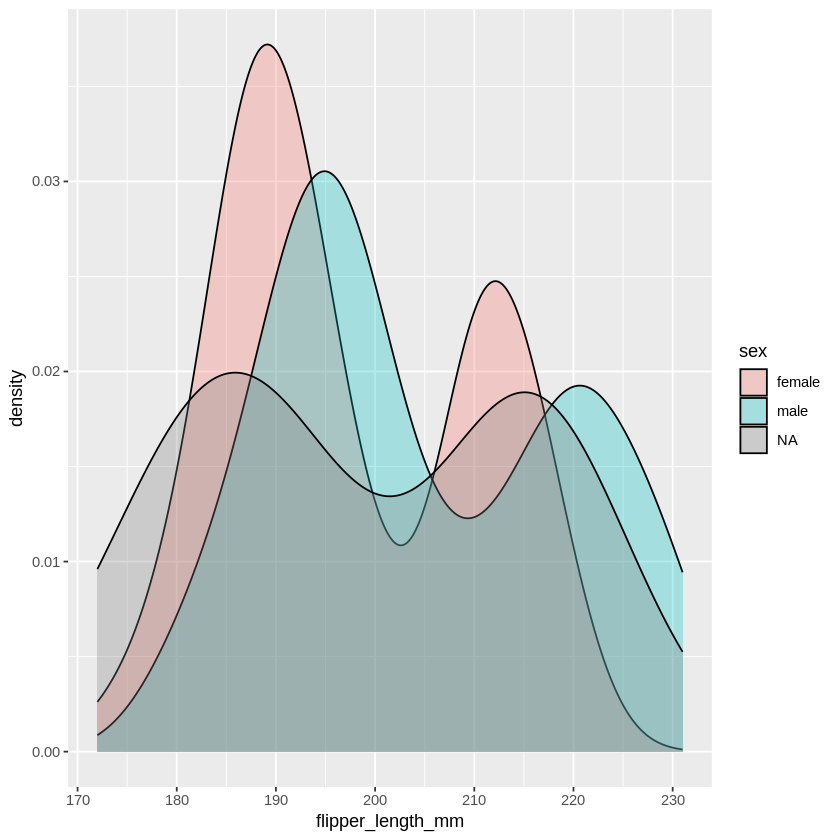

In [9]:
# ignoring the fact there is a class of NA
# each sex has the same bimodal feature
# sex does not seem to be the cause of this feature
ggplot(penguins, aes(x = flipper_length_mm, fill = sex)) +
  geom_density(alpha = 0.3, na.rm = TRUE)

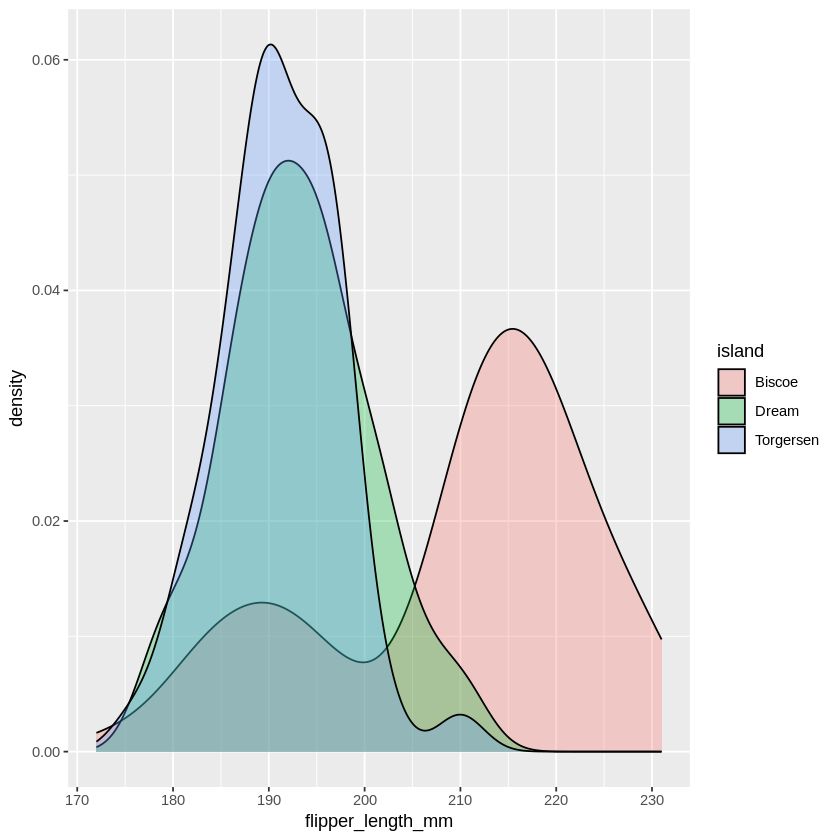

In [10]:
# dream and torgersen same distribution
# biscoe has a different distribution of flipper lengths
ggplot(penguins, aes(x = flipper_length_mm, fill = island)) +
  geom_density(alpha = 0.3, na.rm = TRUE)

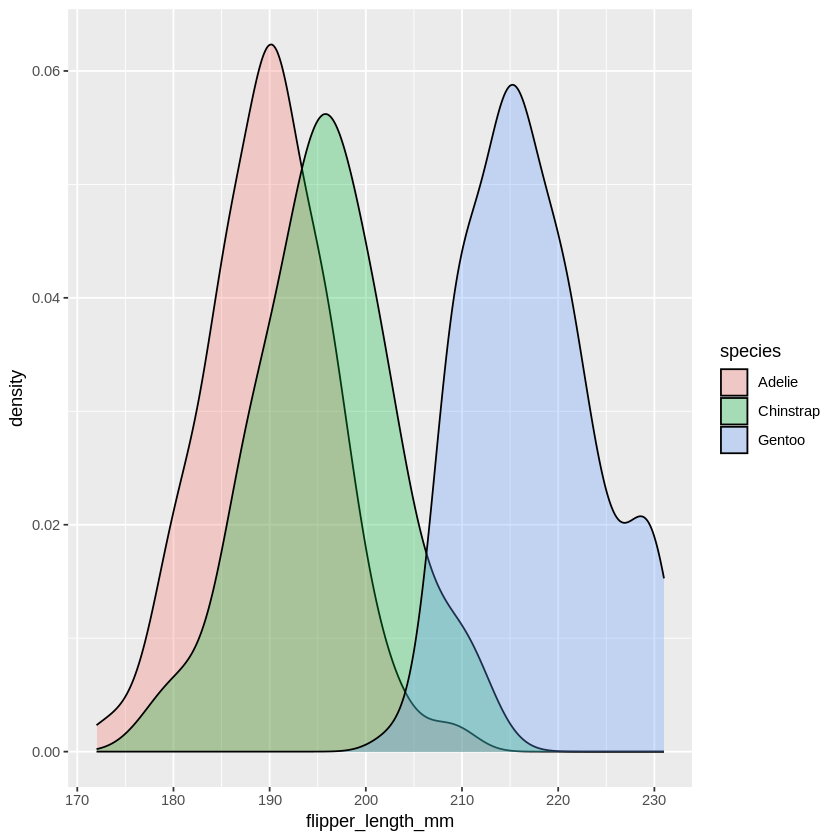

In [11]:
# these three species seem to have different distributions
ggplot(penguins, aes(x = flipper_length_mm, fill = species)) +
  geom_density(alpha = 0.3, na.rm = TRUE)

# <a name="adding-layers">Adding Layers</a>

---

One of the strengths of`ggplot2` is that we can start with a foundation and customize the plot by incorporating additional features. For example, we can start with plot comparing the distribution of flipper lengths for different species above, and then customize the plot by adding the following elements:

1. Adjust the scale for the ticks on both axes.
2. Add a title, subtitle, and $x$-axis label.
3. Remove the gray paneling in the background, but keep the grid lines.
4. Move the legend below the graph, and increase the font size.

Below is an example of how we can store with a foundation and add layers to customize the plot.

## <a name="assign-plot">Assigning a `ggplot()`</a>

---

It is useful to assign a `ggplot` to an object with a descriptive name that we can then modify by adding additional layers. When we assign a `ggplot` to an object, as usual, it will not be printed to the screen. We will also have to print the object to the screen if we want to see it.


In [12]:
# assign the density plot generated above to ggflip
ggflip <- ggplot(penguins, aes(x = flipper_length_mm, fill = species)) +
  geom_density(alpha = 0.3, na.rm = TRUE)

## <a name="custom-scale">Customizing the Scales</a>

---

We can add two layers to `ggflip` using the functions `scale_x_continuous()` and `scale_y_continuous()` to customize the scales. Chaning the scale on an axis will adjusts the limits, set the ticks, and the grid lines. In the first code cell below:

- We start with the foundation `ggflip`.
- We add each layer with `+`.
- We assign the result back to `ggflip` (and overwrite the original plot).
- Nothing will be displayed on screen.


In [13]:
ggflip <- ggflip +
  scale_x_continuous(breaks = seq(170, 235, by = 5)) +  # customize scale on x-axis
  scale_y_continuous(breaks = seq(0, 0.07, by = 0.01))  # customize scale on y-axis

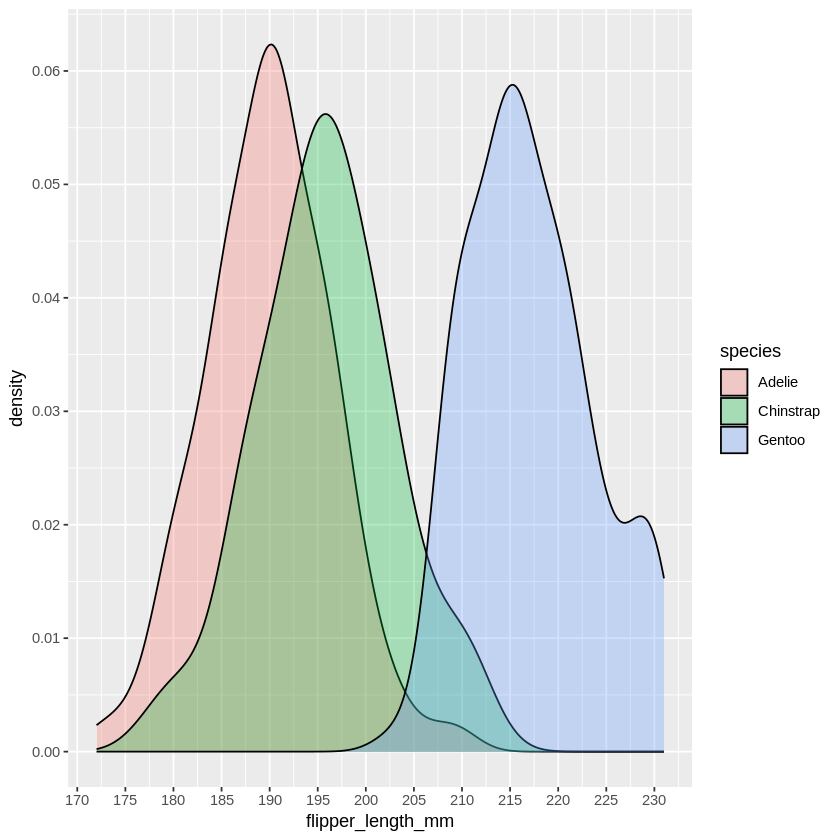

In [14]:
# remember we need to print to the screen to display it
ggflip

## <a name="custom-label">Customizing Titles and Labels</a>

---

We can add/modify labels, titles, and captions of our plot using the `labs()` function in a new layer. Run `?labs` to see a list of possible arguments we can pass into the labs()` function.


In [15]:
?labs

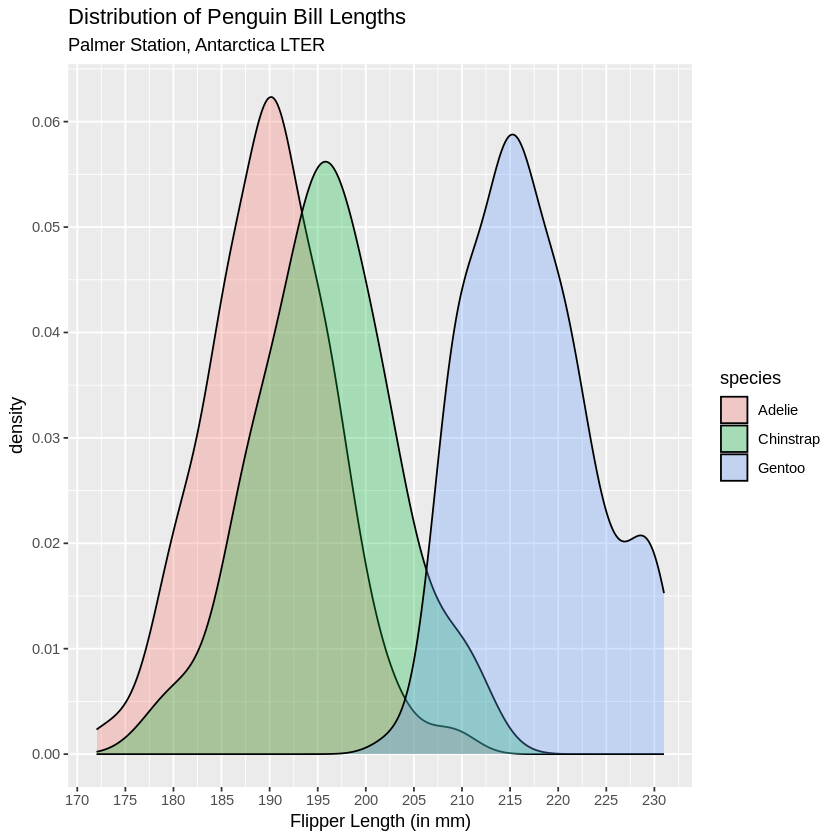

In [16]:
ggflip <- ggflip +
  labs(
    title = "Distribution of Penguin Bill Lengths",
    subtitle = "Palmer Station, Antarctica LTER",
    x = "Flipper Length (in mm)"
  )
ggflip

## <a name="themes">Using Themes</a>

---

A `theme` is a customized style that changes the overall appearance of our graphic in non-data related ways.`ggplot2` provides a number of built-in themes. Some of the built-in themes include:

-   `theme_gray`: The default theme. Gray background and white grid lines.
-   `theme_bw`: White background and gray grid lines.
-   `theme_classic`: White background and no grid lines.
-   `theme_minimal`: White background, no grid lines, no axis lines.
-   `theme_light`: White background, gray grid lines, and a box around the plotting region.
-   `theme_dark`: Essentially a “dark” opposite to `theme_light`.

## <a name="quest2">Question 2</a>

---

Explore the built-in themes and choose your favorite theme for the plot stored in `ggflip`.

<br>


## <a name="custom-font">Customizing Themes: Adjusting Fonts and Legend Position</a>

---

It is also possible to control individual components of each theme by adding a `theme()` layer that modifies the styling of non-data components of the plot. For example:

- the placement of the legend,
- the font size used on the label of the $x$-axis,
- the font color used for the values on the $y$-axis,
- use italics for the caption of the plot,
- to name just a few!

Run `?theme` to see a long, extensive list of arguments we can use in the `theme()` layer to customize a plot. In the plot below, we make two modifications indicated by comments in the code cell.

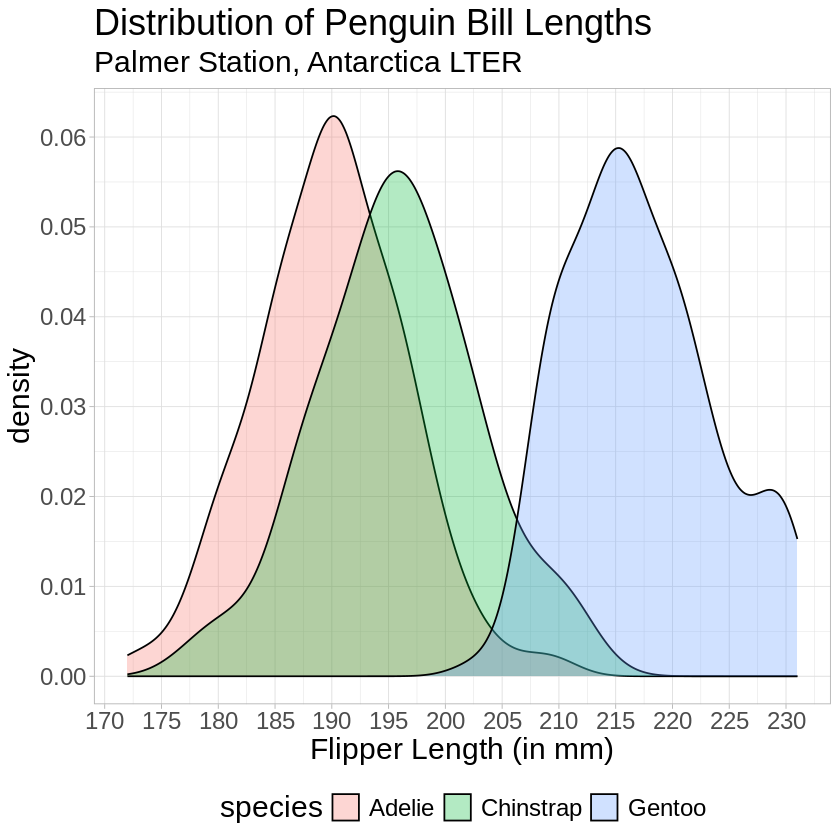

In [18]:
ggflip <- ggflip +
  theme(
    legend.position = "bottom",  # place legend at bottom of plot
    text = element_text(size=18))  # increase font size
ggflip

# <a name="scatter-plots">Scatter Plots</a>

---

A <font color="dodgerblue">**scatter plot**</font> is a graph of a relationship between **two numeric variables**. We wish to determine whether a change in the value of one variable (predictor) is associated with a corresponding change in the value of the other variable (response).

- The predictor variable is plotted on the the $x$-axis.
- The response variable is plotted on the $y$-axis.
- Each observation in the data set corresponds to one point with coordinates $(x_i, y_i)$.

In general, we use scatter plots to learn information about the *association* between the two variables.

-   A positive association is present when both variables tend to increase together.
-   A negative association is present when one variable tends to decrease when the other increases.
-   A linear association is present when the relationship between the two variables is a straight line.
-   A nonlinear association is present when the relationship between the two variables is a curve.
-   It is possible that no clear association is present in the data in which case the points may look like a cloud with no pattern.




## <a name="removing-na">Removing Missing Values</a>

---


In [20]:
# keeps obs that do not have bill length or body mass missing
penguins <- penguins[!is.na(penguins$bill_length_mm) | !is.na(penguins$body_mass_g ), ]

## <a name="base-scatter">Creating a Basic Scatter Plot</a>

---

To create a scatter plot with `ggplot2` we:

- Map the predictor variable to the `x` axis.
- Map the response variable to the `y` axis.
- Add the layer `geom_point()`.

## <a name="quest3">Question 3</a>

---

Use the `penguins` data to construct a scatter plot with `body_mass_g` as the predictor variable and `bill_length_mm` as the response variable.

<br>  


## <a name="interpret-scatter">Interpreting a Scatter Plot</a>

---


In the plot in [Question 3](#quest3), we see thee is a <font color="dodgerblue">**positive association**</font> between body mass and bill length which makes practical sense. Visually, we can see this pattern as follows:

- As we move to the right, the points tend to go up.
- As the predictor variable `body_mass_g` increases, the response variable `bill_length_mm` also tends to increase.


However, it appears that there may be some observations in the upper left part of the graph that do not match the overall linear trend.

This could mean:

1.  The data are *noisy*, which simply means the patterns aren't as strong and clear as we would like.

2.  There is a third variable, not accounted for, that has a relationship with the other two variables.

  -   When we are not accounting for this variable, it is called a *lurking variable*.
  -   When we account for a lurking variable in our analysis, it becomes a *confounding variable*.
  -   We are defining lurking and confounding variables in a general sense and not with statistical rigor.



## <a name="add-aesthetic">Searching for Confounding Variables with Aesthetics</a>

---

We can include additional information about other variables (possibly confounding) variables in a scatter plot using additional aesthetic mappings. See [A Dictionary of Common Aesthetic Mappings](#common-aes) in the Appendix for a list of some possible mappings.


Let's consider an analysis of `body_mass_g` and `bill_length_mm` that accounts for `species`. Specifically, we will use the `color` aesthetic so that each penguin species is shown in a different color.

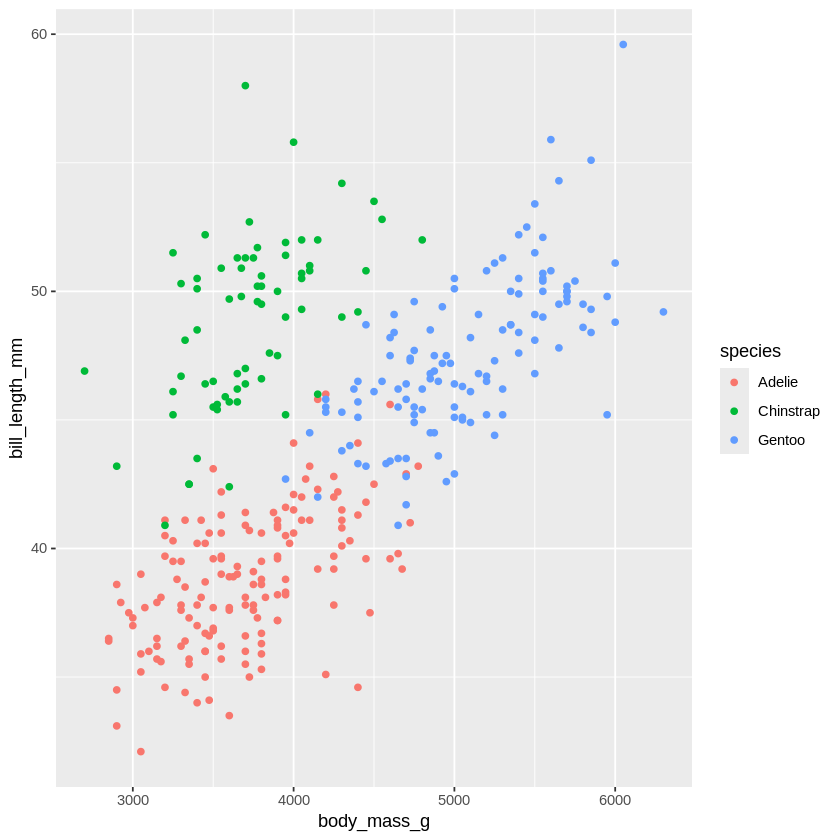

In [22]:
ggplot(penguins, aes(x = body_mass_g, y = bill_length_mm, color = species)) +
  geom_point()

Accounting for `species` in the analysis shows clear patterns for the
three penguin species.

- Chinstrap penguins tend to have smaller body mass but longer bill lengths.
- Adelie penguins have smaller body mass and bill
lengths.
- Gentoo penguins tend to have larger body mass and bill lengths
than the other two species.

As previously mentioned, we want our plots to be as clear as possible.
Some individuals have difficulty interpreting colors in graphics. We can
add another distinguishing characteristic for the different species. In
this case, we will change the `shape` of the plotted points for each
species. This provides another aid for correctly interpreting the
graphic.

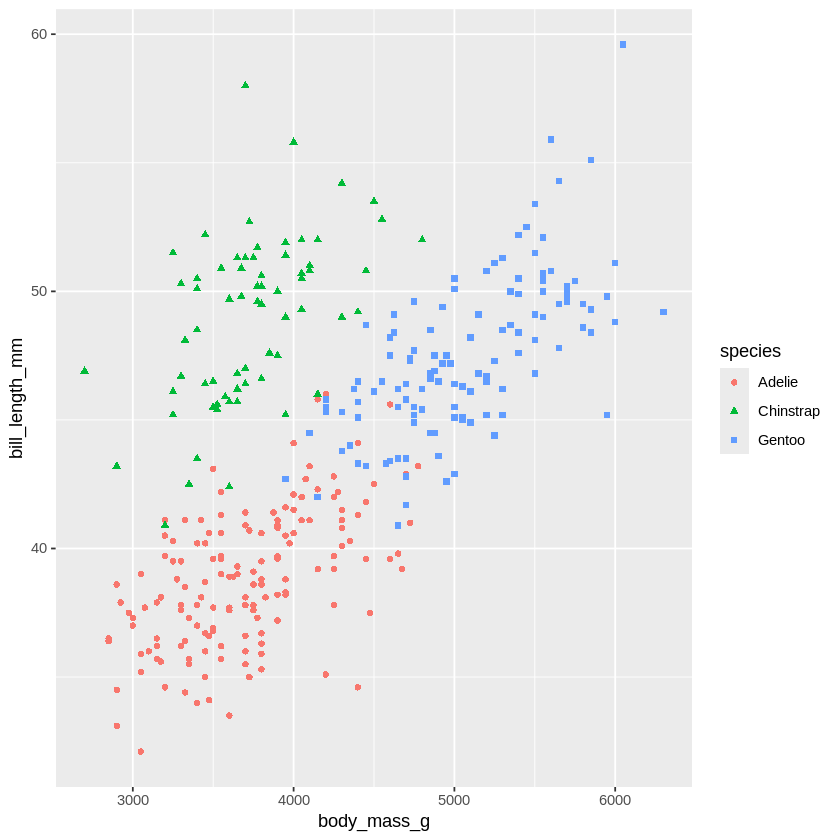

In [23]:
ggplot(penguins, aes(x = body_mass_g, y = bill_length_mm, color = species, shape = species)) +
  geom_point()

## <a name="geom-or-map">Mapping an Aesthetic Inside a `geom`</a>

---

Sometimes we may want to set a visual property of a geom manually as an argument inside of a geom function as opposed to setting the visual property by mapping a variable to an aesthetic inside the `aes()` mapping.

For example, maybe we would like to increase the `size` of all of the points in the scatter plot to the same size regardless of any feature of the data. Then we can define the argument `size = 3` (or whatever we like) inside the `geom_point()` function instead of the `aes()` mapping.


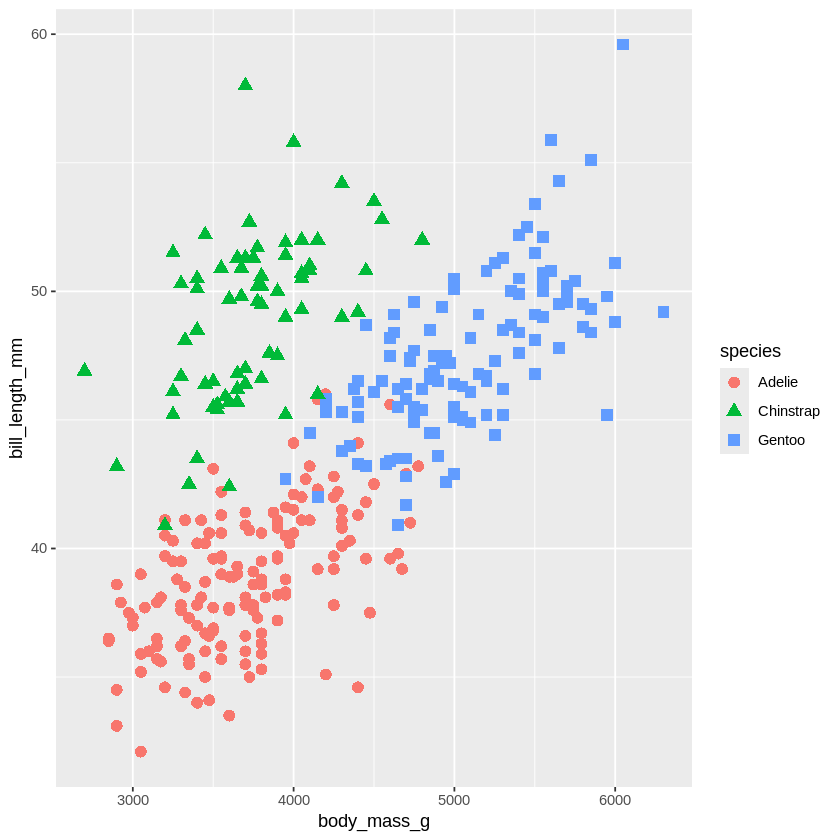

In [24]:
ggplot(penguins, aes(x = body_mass_g, y = bill_length_mm, color = species, shape = species)) +
  geom_point(size = 3)

## <a name="smooths">Adding a Smoother to a Plot</a>

---

A <font color="dodgerblue">**smoother**</font> in `ggplot2` is a model that that attempts to estimate the average relationship between a response variable (typically the `y` variable) and one or more predictor variables (typically the `x` and possibly other variables).

- A smoothing layer can be added to a plot using `geom_smooth`.
- Adding a smoother to a plot can make relationships between variables even clearer.
- A pointwise confidence interval is shaded in gray by default to include an assessment of uncertainty.
  - We can turn off with confidence interval shading with the option `geom_smooth(se = FALSE)`.



`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


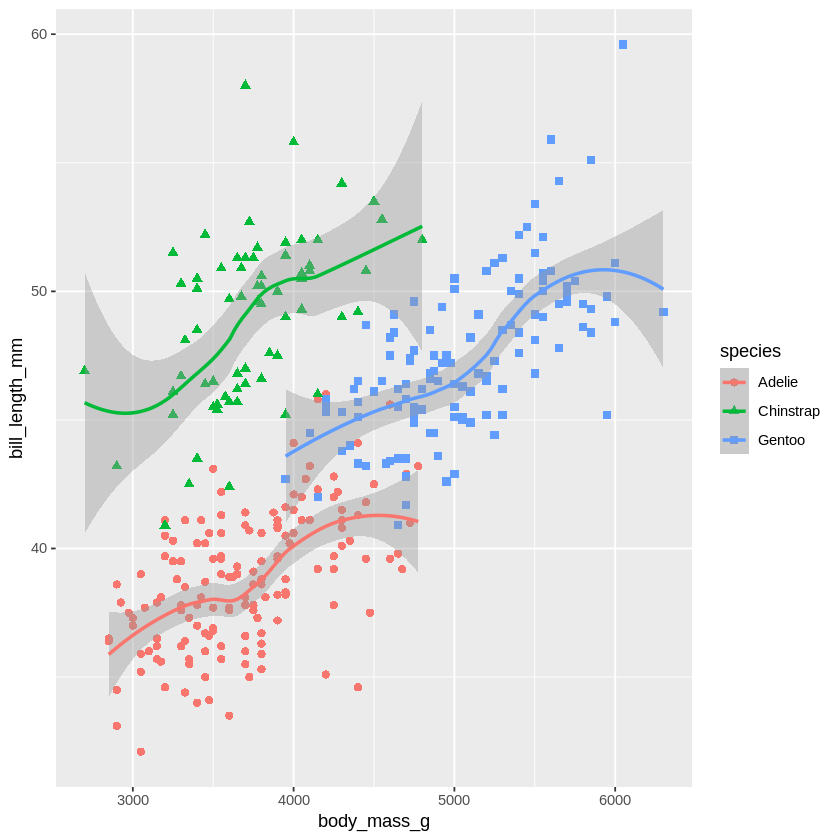

In [25]:
ggplot(penguins, aes(x = body_mass_g, y = bill_length_mm, color = species, shape = species)) +
  geom_point(size = 2) +
  geom_smooth()

### <a name="linear-model">Adding a Simple Linear Regresion Model</a>

---


There are many different models we can choose for the smoothing `method`. `ggplot2` takes the methods:

  - `lm` (linear model),
  - `glm` (generalized linear model),
  - `gam` (generalized additive model),
  - `loess` (local fitting),
  - or a function (e.g., `MASS::rlm` for a robust linear model).
  
If we do not know what these are but think they sound fancy, we should not add them to our plot. If we do not understand what we are adding to our plot, then it is not going to help us understand the data! Run the code cell below to open the help documentation for `geom_smooth()` for further information.




In [26]:
?geom_smooth

## <a name="quest4">Question 4</a>

---

A linear model or <font color="dodgerblue">**simple linear regression**</font> model is the straight line that minimizes the sum of the squared deviations between the actual $y$ values and the predicted values on the line.

Edit the code cell below to add simple linear regression lines to the scatter plot we created above with `geom_smooth()` as a new layer on top of our previous `geom_point()`.

<br>  

*Note: All of the same aesthetics will be mapped into both the point and smooth geoms.*

<br>  



## <a name="local-global">Local vs. Global Aesthetic Mappings</a>

---

In `ggplot2`, there are two ways to map a variable to an aesthetic:

- A <font color="dodgerblue">**global aesthetic mapping**</font> applies across all geoms and is specified in the `ggplot` function.

- A <font color="dodgerblue">**local aesthetic mapping**</font> is specified in a specific geom function and only applies to that particular geom.

In the plot above, we applied a global aesthetic mapping to the `species` variable using the `color` aesthetic to obtain three separate linear models for each of the three different species, resulting in a more complete picture.

In the code cell below, we use a local aesthetic mapping to produce a simpler version of the previous plot. This only adds a single line across all groups, which does not explain the relationship between body mass and bill length as well since it does not account for the counfounding variable `species`.


`geom_smooth()` using formula = 'y ~ x'


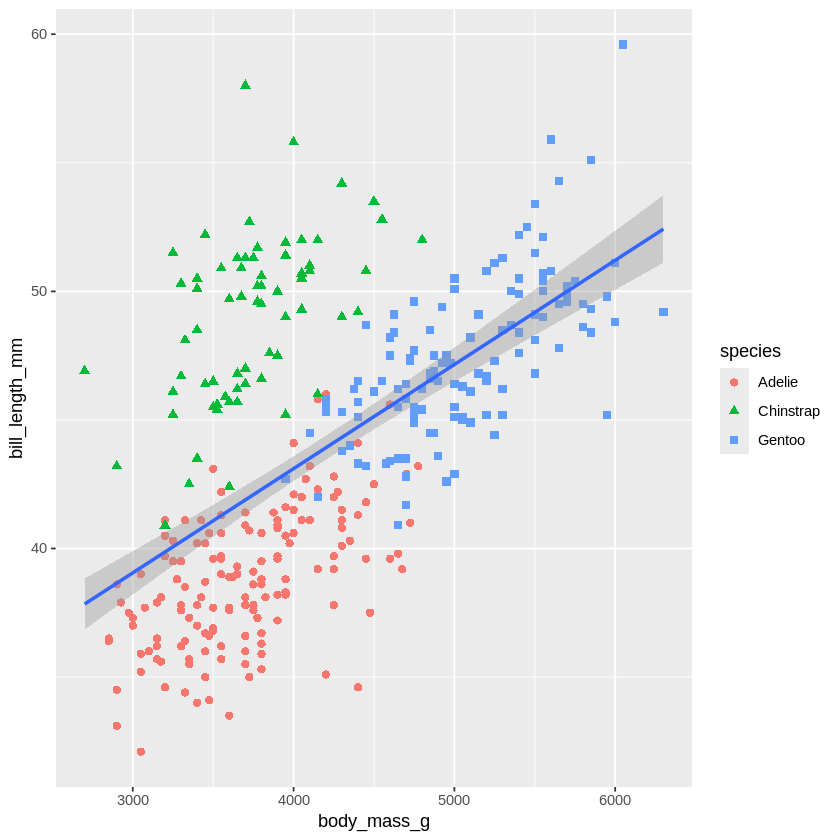

In [28]:
ggplot(penguins, aes(x = body_mass_g, y = bill_length_mm)) +
  geom_point(aes(color = species, shape = species), size = 2) +
  geom_smooth(method = "lm")

## <a name="quest5">Question 5</a>

---

Run the code cell below to store the scatter plot of penguin body mass and bill lengths to `ggpen`. Notice  `species` has been globally mapped the `color` and `size` aesthetics and a linear model smooth has been added separately for each species.


Then customize the plot by adding layers to perform the following edits:

1. Add a title and descriptive labels to the $x$ and $y$-axes.
2. Use a built-in `theme()`.
3. Move the legend to the bottom of the plot and increase the font size.

<br>  


In [ ]:
ggpen <- ggplot(penguins, aes(x = body_mass_g, y = bill_length_mm, color = species, shape = species)) +
  geom_point(size = 2) +
  geom_smooth(method = "lm")

ggpen

## <a name="colorblind-friendly">Adjusting Color Palette for Colorblind-Friendly</a>

---

We can improve the color palette to be more colorblind-friendly with the [`scale_color_colorblind()`](https://jrnold.github.io/ggthemes/reference/colorblind.html) function from the `ggthemes` package.

In [33]:
install.packages("ggthemes")  # installs ggthemes package (but not loaded yet)
library(ggthemes)  # loads ggthemes package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



`geom_smooth()` using formula = 'y ~ x'


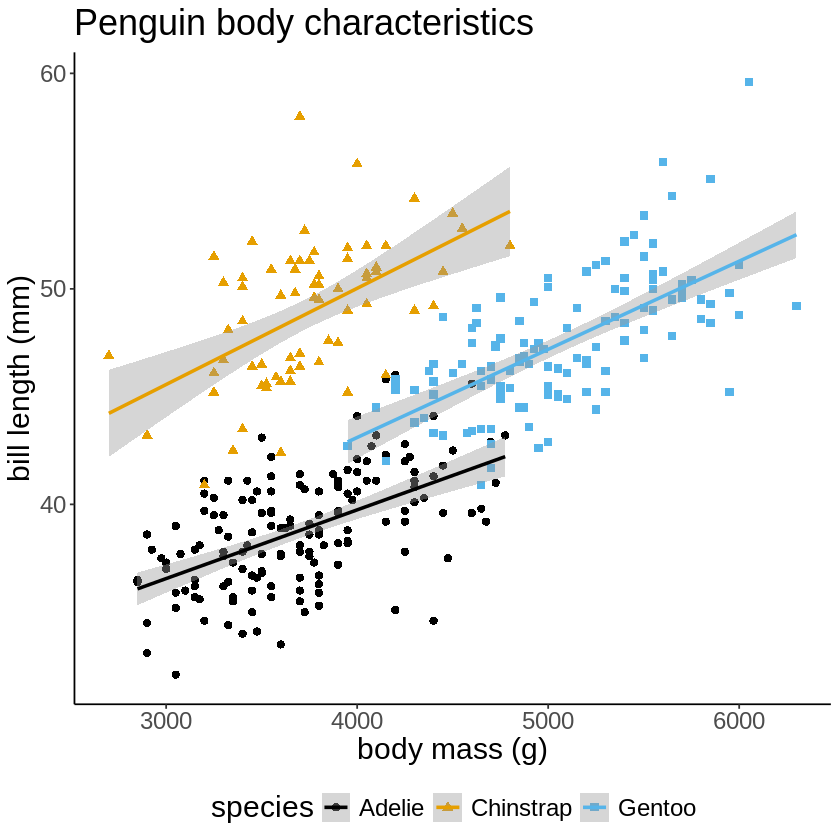

In [34]:
ggpen <- ggpen + scale_color_colorblind()
ggpen

# <a name="facet">Facetting</a>

---

<font color="dodgerblue">**Facetting**</font> a `ggplot` creates separate plotting panels for each level of one or more categorical variables. Facetting creates arrays of plots by subsetting and displaying the same graph for each subset of the data.  Technically, facetting can be performed for discrete `numeric` variables with a relatively small number of unique values, but for practical reasons, facetting is most appropriate for `factor` variables.

There are two functions for creating facetted graphics in `ggplot2`:

-   `facet_wrap` facets the plots based on a single `factor` variable. The panels are wrapped around the plotting window.
  -   Wrapped is typically the more useful type of facetting.
-   `facet_grid` forms a matrix of panels based on row and column facetting variables.



## <a name="wrapped-facet">Wrapped Facetting</a>

---

In the plot below, we facet scatter plots of `bill_length_mm` versus
`body_mass_g` by `species`.

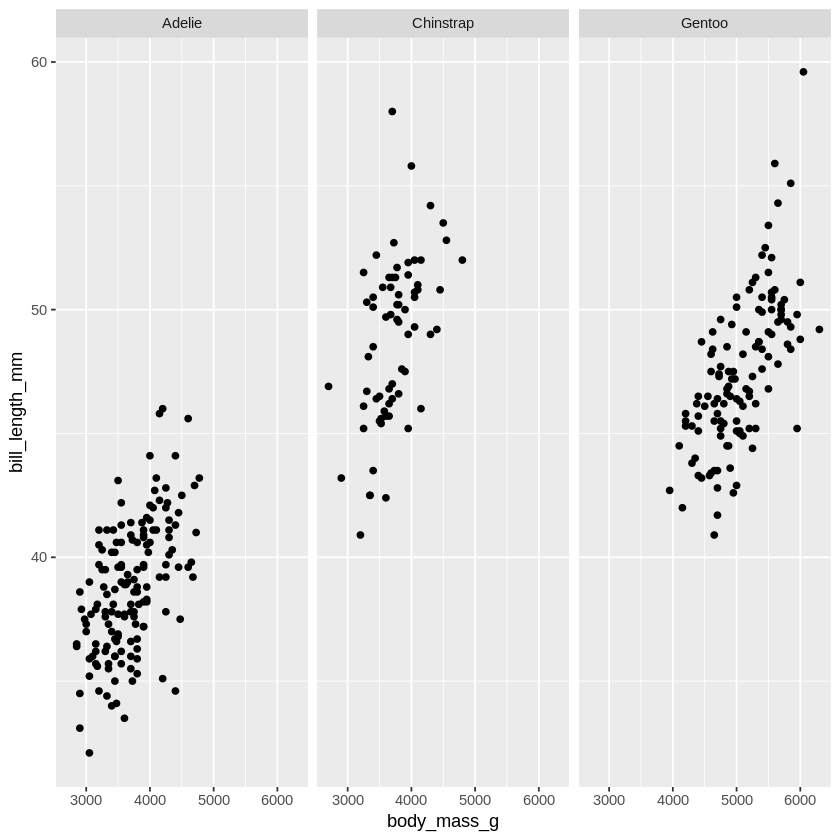

In [35]:
ggplot(penguins, aes(x = body_mass_g, y = bill_length_mm)) +
  geom_point() +
  facet_wrap(~species)


- By default, **the same $x$ and $y$ axes are used in all panels**.
- This is standard because it facilitates direct comparisons across panels.
- This can be customized using the `scales` argument of the `facet_*`
functions. The allowable `scales` argument values are:
  -   `"fixed"`: same x and y axes for all panels. The default.
  -   `"free"`: individual x and y axes for each panel
  -   `"free_x"`: individual x axes for each panel, common y axis
  -   `"free_y"`: individual y axes for each panel, common x axis



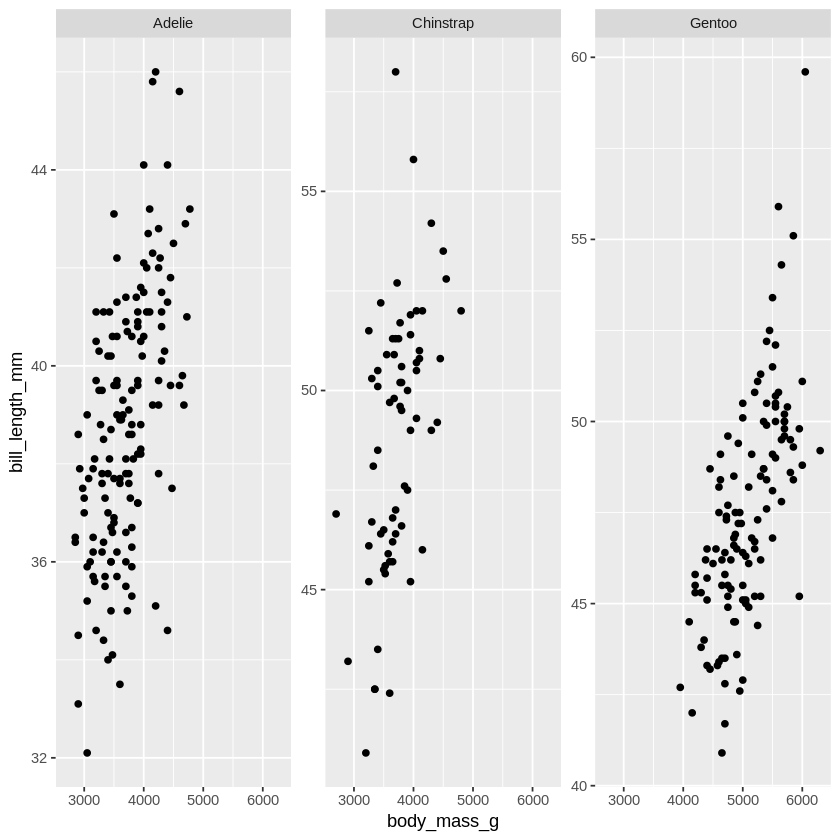

In [36]:
ggplot(penguins, aes(x = body_mass_g, y = bill_length_mm)) +
  geom_point() +
  facet_wrap(~species, scales = "free_y")

## <a name="grid-facet">Grid Facetting</a>

---

We now explore the `facet_grid` function to facet by the `factor` variables `species` and `sex`.  Prior to plotting, we remove the observations with `NA` for the `sex` variable.


In [37]:
# keep observations with sex NOT equal to NA
penguins_clean <- subset(penguins, !is.na(sex))

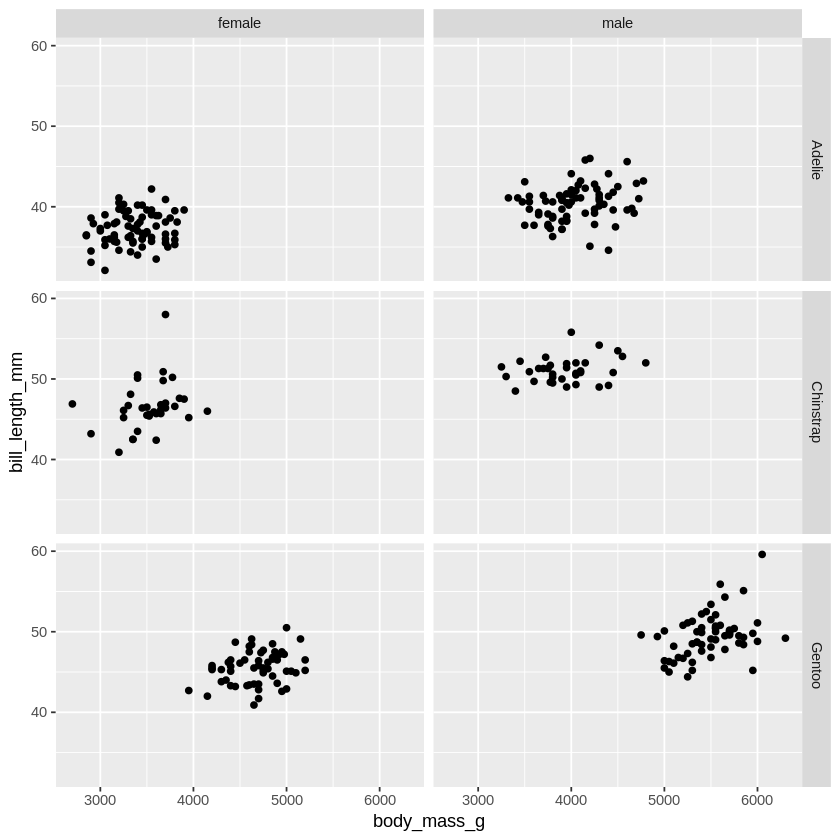

In [38]:
ggplot(penguins_clean, aes(x = body_mass_g, y = bill_length_mm)) +
  geom_point() +
  facet_grid(species ~ sex)

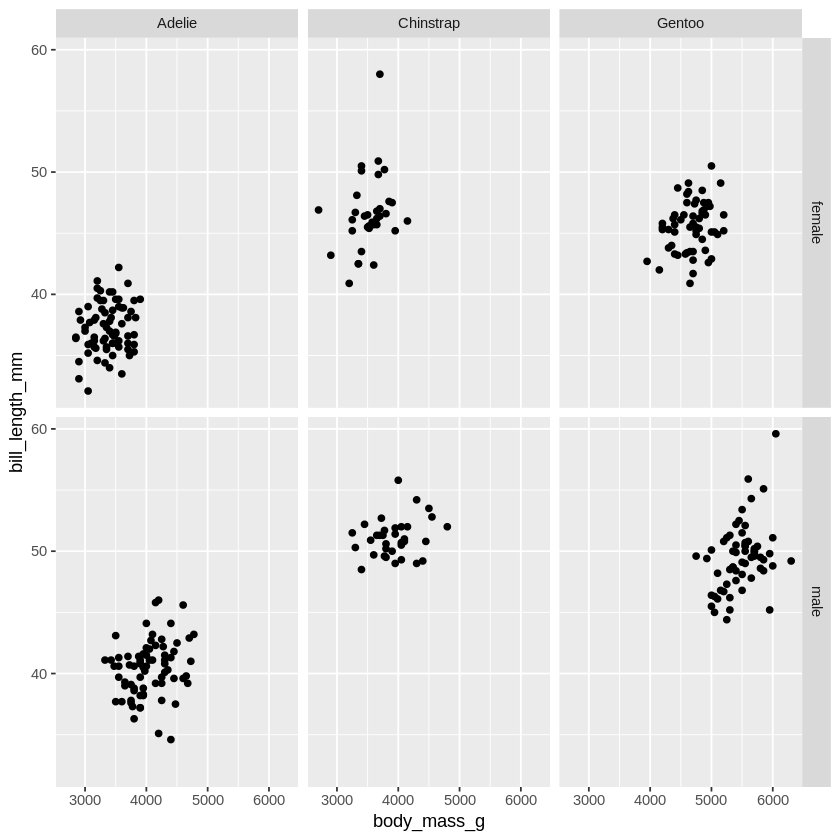

In [39]:
ggplot(penguins_clean, aes(x = body_mass_g, y = bill_length_mm)) +
  geom_point() +
  facet_grid(sex ~ species)

There appears to be differences in the sizes of the male and female
penguins, bit it is difficult to compare the patterns across panels. It
may be more useful to facet by `species` but distinguish by `sex` in a
single panel.

After running the code cell below, it is more clear that across species, the males tend to have greater body mass and bill length in comparison to the females.

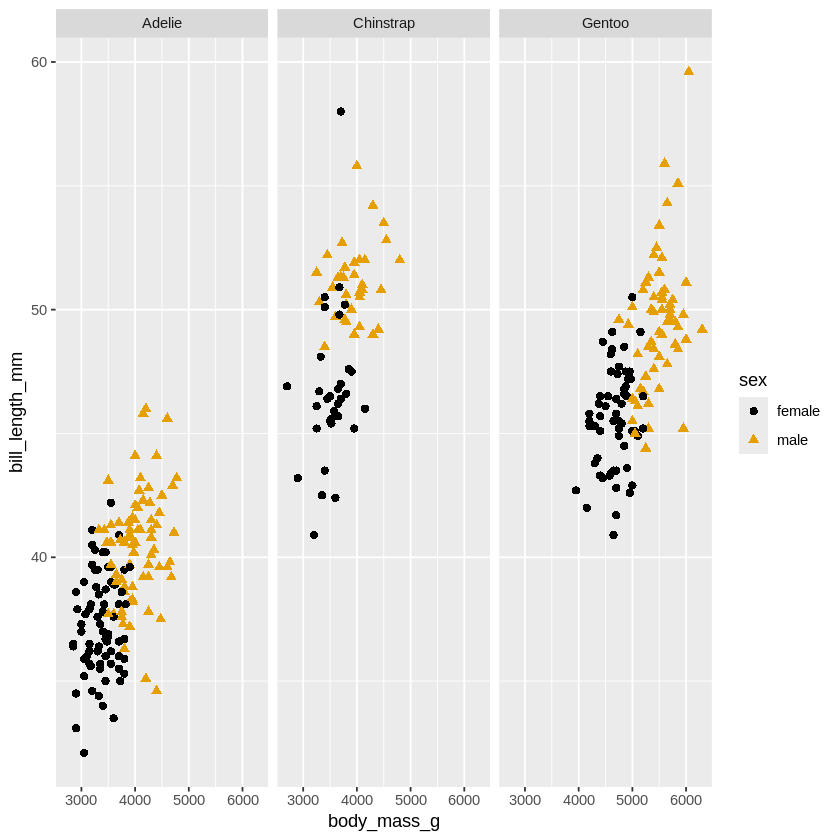

In [40]:
ggplot(penguins_clean, aes(x = body_mass_g, y = bill_length_mm, color = sex, shape = sex)) +
  geom_point(size = 2) +
  facet_wrap(~ species) +
  scale_color_colorblind()

# <a name="stat-trans">Statistical Transformations</a>

---

A <font color="dodgerblue">**statistical transformation**</font> (called a `stat` for short) is the process that `ggplot2` uses to calculate new values for a graph.

- Some geoms (such as scatter plots) plot raw values (variables) from the data frame.
- Other goems (such as bar plots, boxplots, histograms, and smoothers) calculate new values to plot.


Consider a bar plot created with `geom_bar()` in the code cell below.

- The variable `species` from the `penguins` data frame is displayed on the $x$-axis.
- The count is computed and displayed on the $y$-axis.


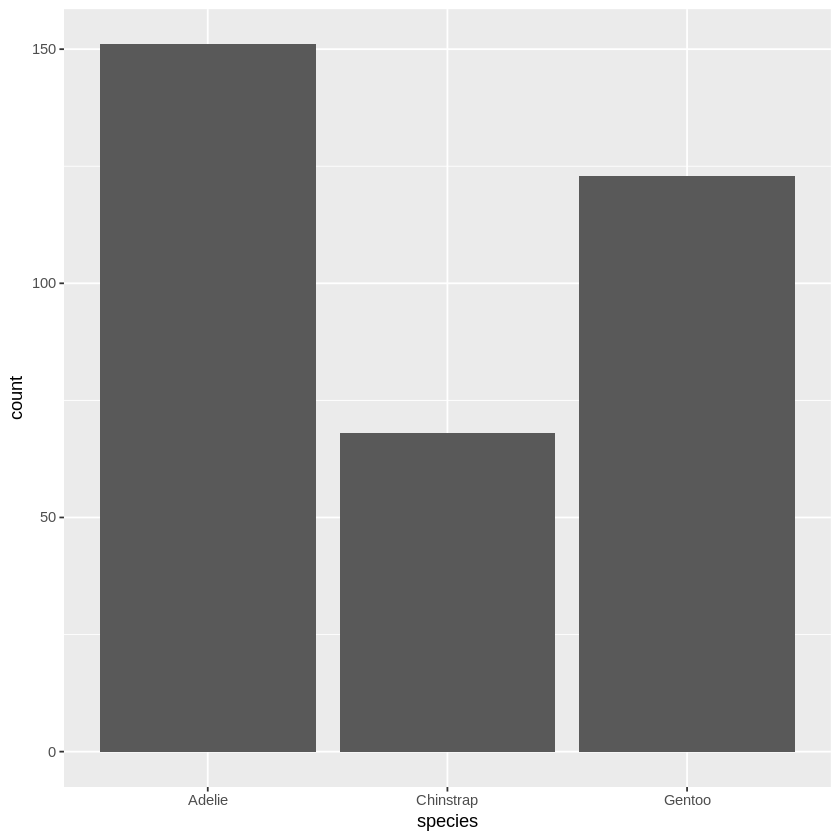

In [41]:
ggplot(penguins) +
  geom_bar(aes(x = species))

## <a name="id-stat">Identifying the Default `stat` of a Geom</a>

---


We can learn which stat a geom uses by inspecting the default value for the stat argument.

- `?geom_bar` shows that the default value for stat is "count", which means that `geom_bar()` uses `stat_count()`.



## <a name="quest6">Question 6</a>

---

What is the default stat used for `geom_smooth()`?

<br>  


In [42]:
?geom_smooth

### <a name="sol6">Solution to Question 6</a>

---



<br>  
<br>  



## <a name="override">Overriding the Default `stat`</a>

---

Depending on the data we have, sometimes we may want to specify a different `stat` argument. In general, custom `stat` arguments are beyond the scope of this tutorial. However, we do consider a simple example involving bar charts.





### <a name="custom-stat-id">Computing and Displaying Counts with `identity`</a>

---

By default, `geom_bar()` uses `stat_count()` to count the number of values
having each level of a `factor` variable and then plots the height of
each bar above the names of the `factor` levels. However, suppose our data frame already has counts for the number of values in each level. In that case, we can change the `stat` argument for `geom_bar` to `"identity"` (for `stat_identity`).

We do not have such a data frame, so we need to create one to illustrate this point. Run the code cell below to create a data frame `penguins_count` with two variables `species` and `count`.

In [43]:
# count values with each level
penguins_count <- as.data.frame(table(penguins$species))
# rename variales
names(penguins_count) <- c("species", "count")
# print data frame
penguins_count

species,count
<fct>,<int>
Adelie,151
Chinstrap,68
Gentoo,123


We now create a bar plot mapping the `count` variable stored in `penguins_count` to the `y` aesthetic and setting the `stat` argument of `geom_bar` to `"identity"`.

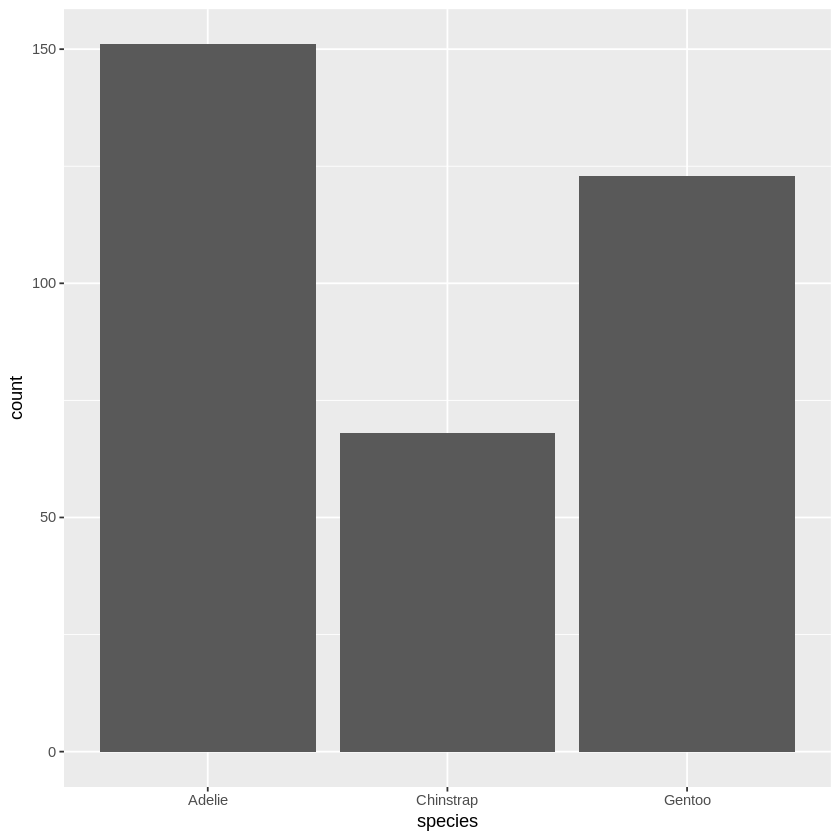

In [44]:
ggplot(penguins_count, aes(x = species, y = count)) +
  geom_bar(stat = "identity")

### <a name="custom-stat-prop">Computing and Displaying Computing Relative Frequencies</a>

---

If for example we would like to construct a bar plot that displays percentages or proportions instead of counts on the vertical axis, then we can apply the following steps:

1. Using the data, compute and store the statistic for each level of the variable ourself.
2. Add the new the statistic to the data frame (or create a new data frame).
3. Generate a `ggplot` using the categorical variable (mapped to `x`) and the new statistic (mapped to `y`) with the option `geom_bar(stat = "identity")`.

For example, suppose we want to plot percentages on the vertical axis.

- Run the first code cell below to first create a data frame `penguins_percent` with two variables `species` and `percentage`.
- Run the second code cell to generate the bar plot.

In [45]:
# count values with each level
penguins_percent <- as.data.frame(prop.table(table(penguins$species)) * 100)
# rename variales
names(penguins_percent) <- c("species", "percentage")
# print data frame
penguins_percent

species,percentage
<fct>,<dbl>
Adelie,44.15205
Chinstrap,19.88304
Gentoo,35.96491


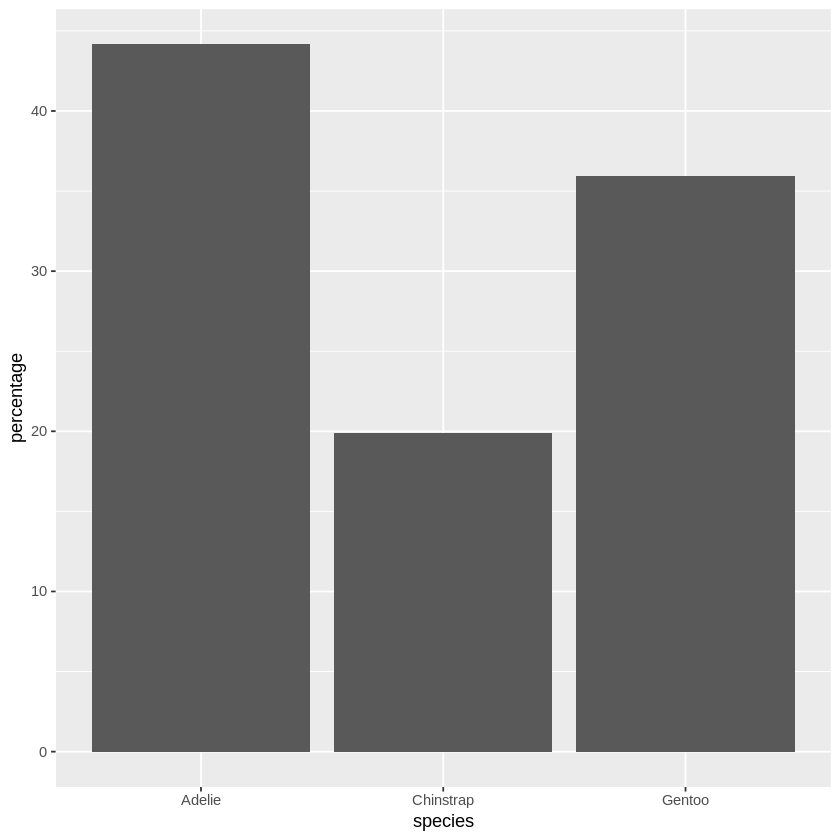

In [46]:
ggplot(penguins_percent, aes(x = species, y = percentage)) +
  geom_bar(stat = "identity")

### <a name="after_stat">Override Default Mapping to Aesthetics with `after_stat`</a>

---

 In the module [Getting Started with ggplot2](https://githubtocolab.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/blob/main/05-Getting-Started-with-ggplot2.ipynb), we discussed another method converting counts to proportions on the vertical axis of a bar plot. Namely, we can set statistical transformation to another function besides the default by mapping the `y` aesthetic using the `after_stat()` function.




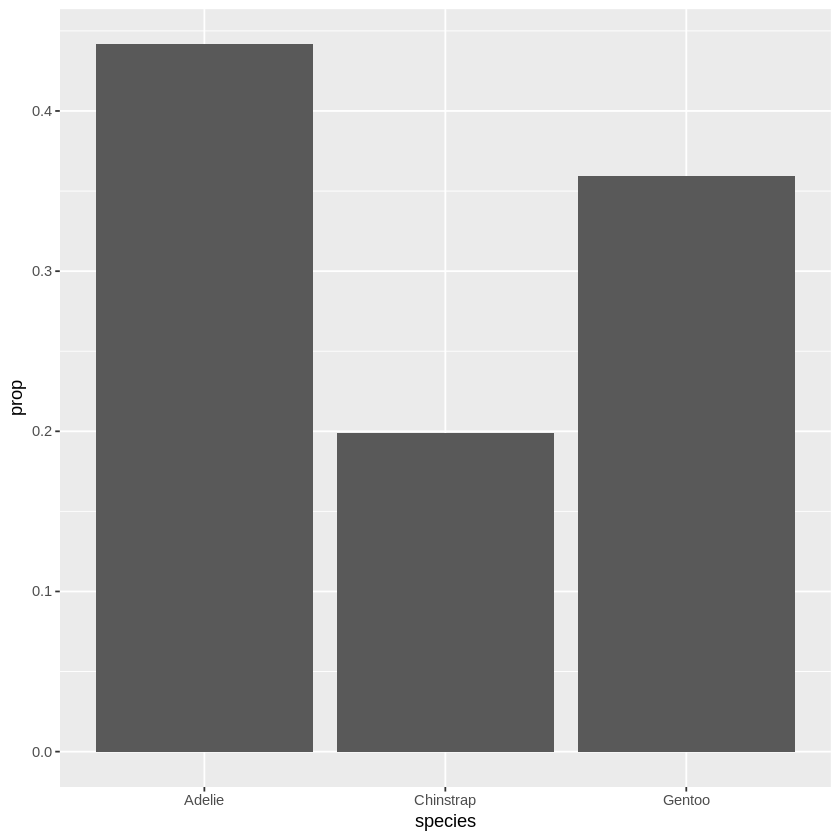

In [47]:
ggplot(penguins, aes(x = species, y = after_stat(prop), group = 1)) +
  geom_bar()

# <a name="stacked-bar">Comparing Two Categorical Variables: Adjusting the Position on Bar Plots</a>

---

Suppose we want to compare the relation between two different categorical variables, say `species` and `sex`. For example,

> Is the distribution of sex the same for the three species of penguins in the `penguins` data frame?

Consider the <font color="dodgerblue">**stacked bar chart**</font> below in which blocks of different `fill` colors corresponding to each `sex` are stacked to form one vertical for each of the three `species` on the `x` axis.

If we compare this bar chart with the original one that does not fill by
`sex`, the bar height is identical. However, within each species, we
`fill` the bars to show the number of penguins with each level of `sex`.

This plot is difficult to interpret since it we would need to do some calculations determine approximately how many male, female, and `NA` observations there are within each species. While the updated bar chart compactly provides a lot of information, it does not facilitate easy interpretation.

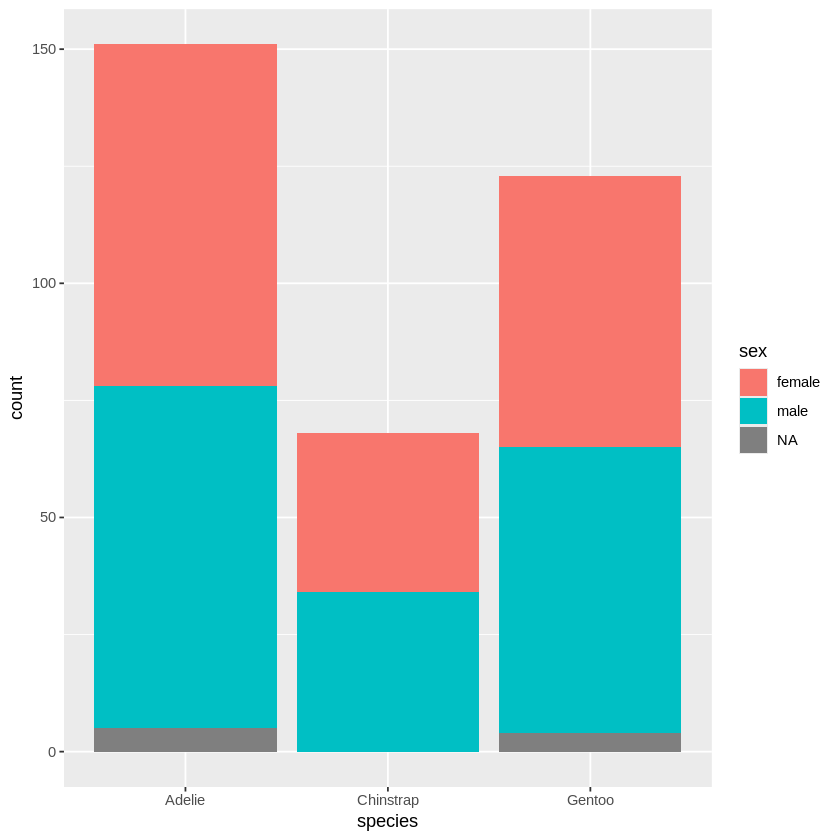

In [48]:
ggplot(penguins, aes(x = species, fill = sex)) +
  geom_bar()

## <a name="position">Adjusting the Position</a>

---

The `position` argument of a geom describes the positions of the objects produced. Most of the time this is pretty straightforward, but there can be times when it is helpful (or unhelpful) to customize the `position`.

In this section, we will see how `stack`, `fill`, and `dodge` can be used in the `position` argument. While these examples demonstrate their use, some of the results are an absolute mess.

## <a name="quest7">Question 7</a>

---

Run the command `?geom_bar` in the code cell below and identify the default `position` setting.

<br>  


In [50]:
?geom_bar()

### <a name="sol7">Solution to Question 7</a>

---



<br>  
<br>  



### <a name="pos-fill">Position: Fill</a>

---

If we wanted to compare the proportion of male, female, and `NA` penguins in each species, we can change the `position` argument to `fill`. In that case, the bars within each level of `species` will be scaled to one, directly facilitating comparisons between the colors within each bar.

The plot below is an improvement. For example, we can see that the proportion of males is close to 50% for all species. But we can experiment with other positions to see if we can improve the display further.


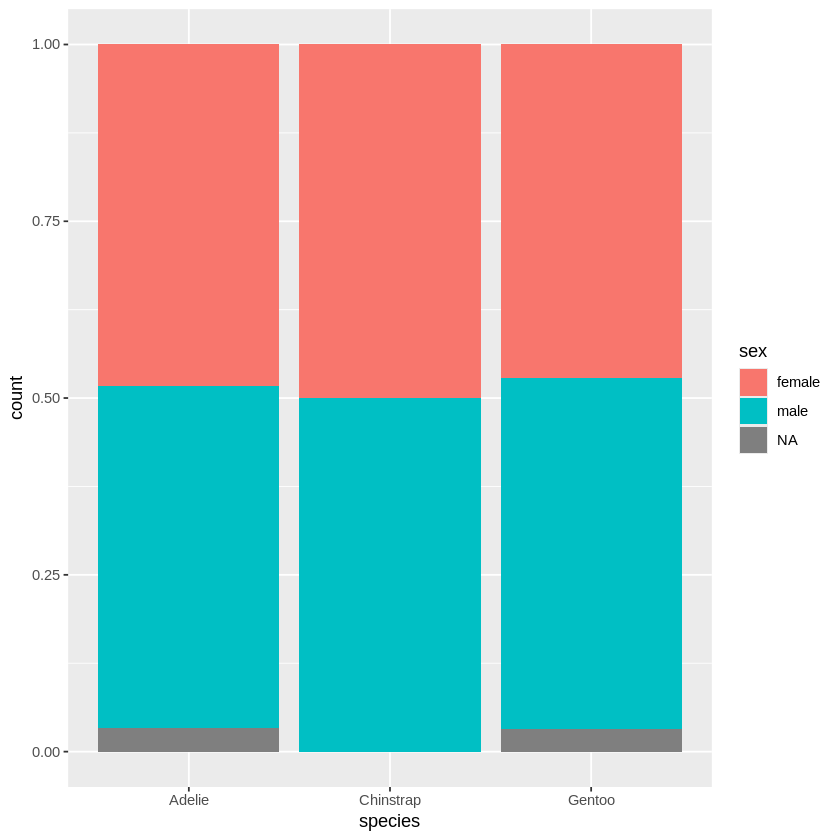

In [ ]:
ggplot(penguins, aes(x = species, fill = sex)) +
  geom_bar(position = "fill")

### <a name="switch-x-and-fill">Switching `x` and the `fill`</a>

---

If we switch the role of the `x` and `fill` aesthetics, we get a similar looking stacked relative frequency bar plot. However, we should be very careful in how we interpret the values in the plot!

- The blue bar in the middle, Chinstrap bar in the plot above tells us that of the Chinstrap penguins in the data, about 50% are male.
  - Proportions are relative to the totals in each species (`x` aesthetic).

$$P( \text{Male} \ | \ \text{Chinstrap} ) \approx 0.5.$$

- The green bar in the middle, Male bar in the plot below tells us that of the male penguins in the data, about 20% are Chinstrap.
  - Proportions are relative to the totals in each sex (`x` aesthetic).


$$P( \text{Chinstrap} \ | \  \text{Male} ) \approx 0.2.$$


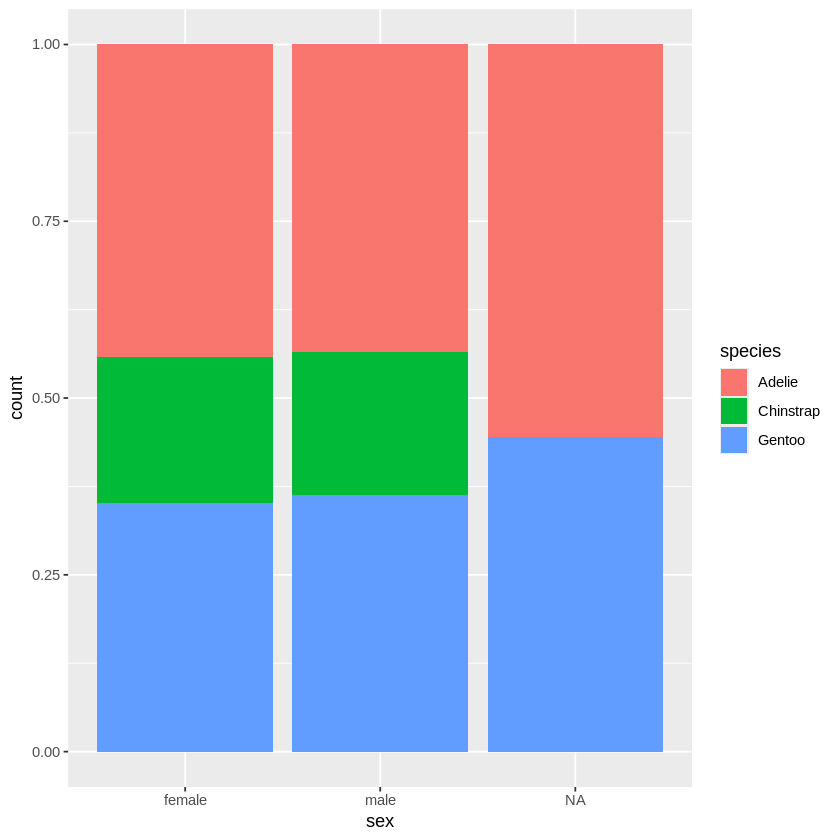

In [ ]:
ggplot(penguins, aes(x = sex, fill = species)) +  geom_bar(position = "fill")

### <a name="pos-fill">Position: Dodge</a>

---

Lastly, if we do not want to `stack` or `fill` the bars, we can have them `dodge` each other. In that case, the overlapping bars will “dodge” each other and sit next to each other in the plot.

- This is also referred to as a *clustered* bar chart.

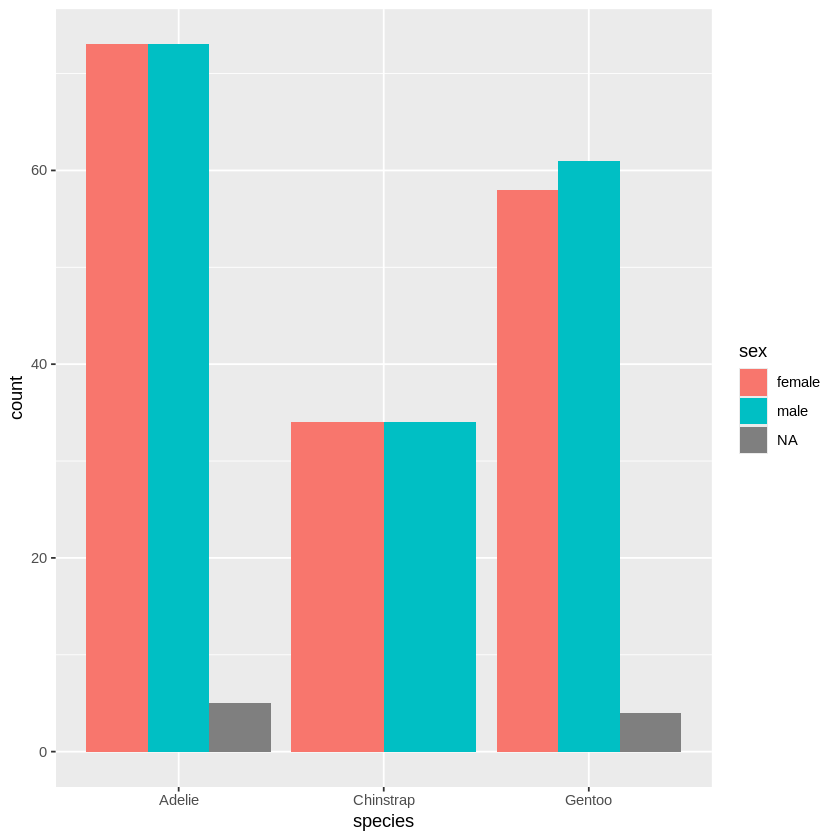

In [51]:
ggplot(penguins, aes(x = species, fill = sex)) +
  geom_bar(position = "dodge")

Alternatively, if we want to highlight the composition of `sex` within
each `species`, then we can also create a bar chart of `sex` while **facetting** by `species`. This plot is quite similar to the “dodge” plot above, but provides further distinction between the charts for each species.

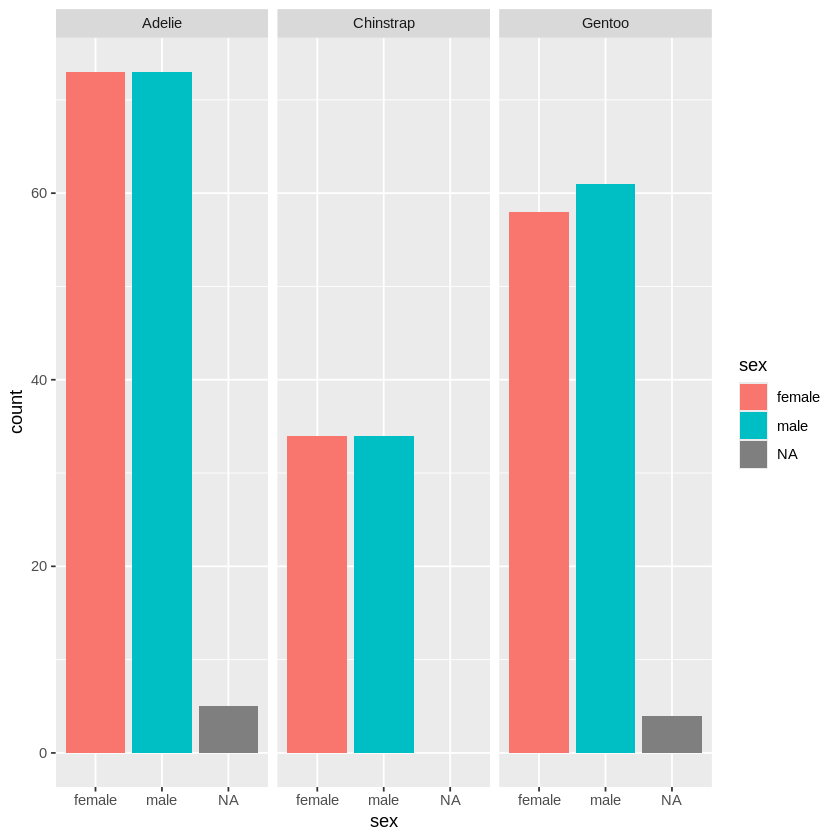

In [ ]:
ggplot(penguins, aes(x = sex, fill = sex)) +
  geom_bar() +
  facet_wrap(~ species)

If we want to compare the number of penguins with each `sex` within
each `species`, this graphic is not too bad. However, the bars
representing male penguins (or alternatively, female penguins) are
spread out and more difficult to compare directly because of the other
bars between them.

If we want to compare the number of penguins from each `species` that are female or male, we can switch the role of the aesthetics and create a plot such as the one below.


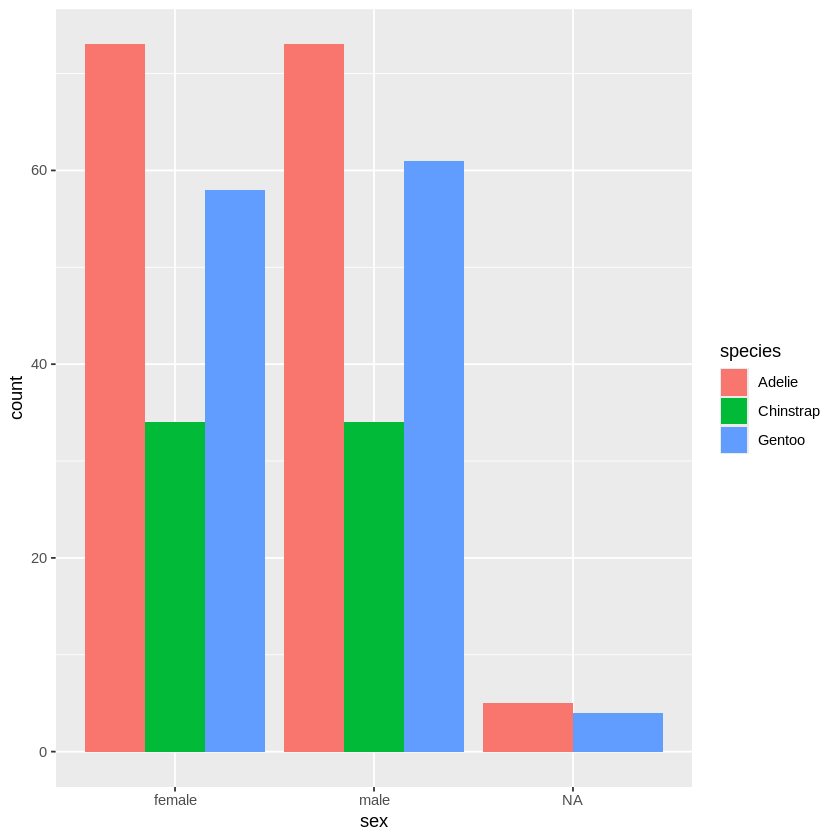

In [60]:
ggplot(penguins, aes(x = sex, fill = species)) +
  geom_bar(position = "dodge")

## <a name="quest8">Question 8</a>

---

Create a similar graph as the one create in the previous code by facetting instead of using the "dodge" position.

<br>  


The examples above are shown for factor variables with only three levels
of each factor. However, the issues mentioned above are magnified when our `factor` variables have many levels. To illustrate this point, we present “stack", "fill", and “dodge” bar charts of the `diamonds` data in the `ggplot2` package, in which we compare the `cut` and `clarity` of diamonds. Each variable has at least 5 levels. The large number of levels for the `cut`
and `clarity` variables make it difficult to quickly interpret the
relationship between the two variables.  

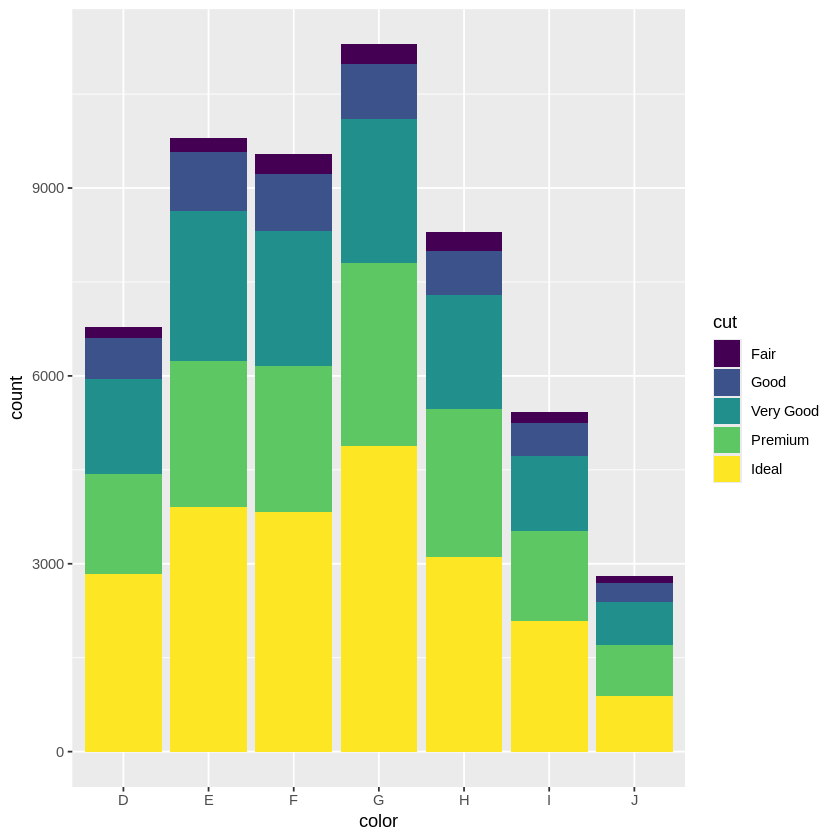

In [65]:
# position stack is the default
dplot <- ggplot(diamonds, aes(color, fill = cut))
dplot + geom_bar()

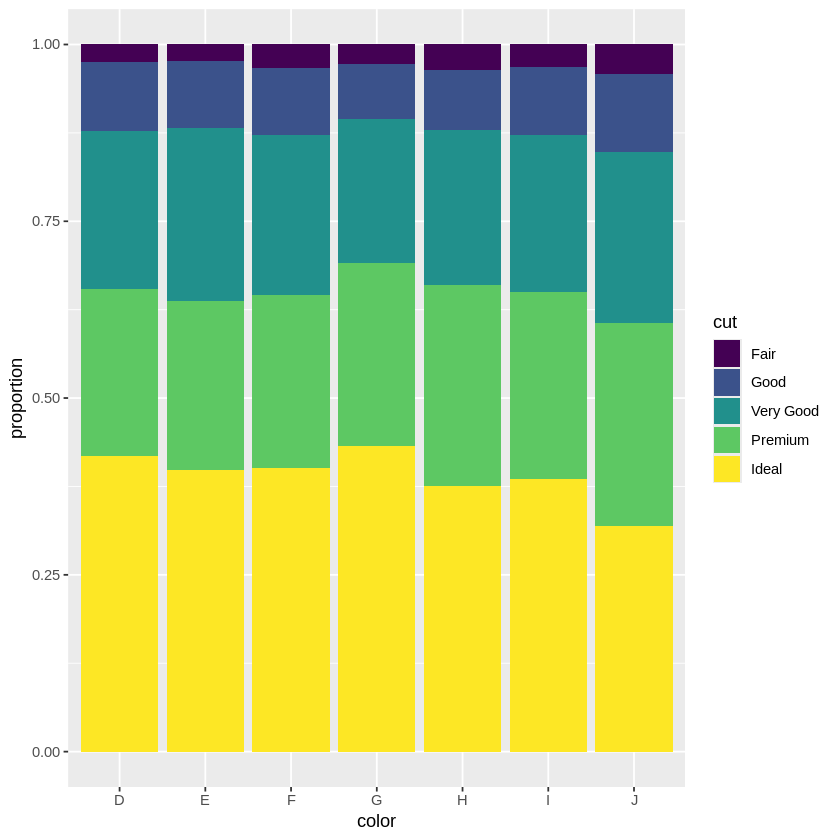

In [68]:
dplot + geom_bar(position = "fill") + ylab("proportion")

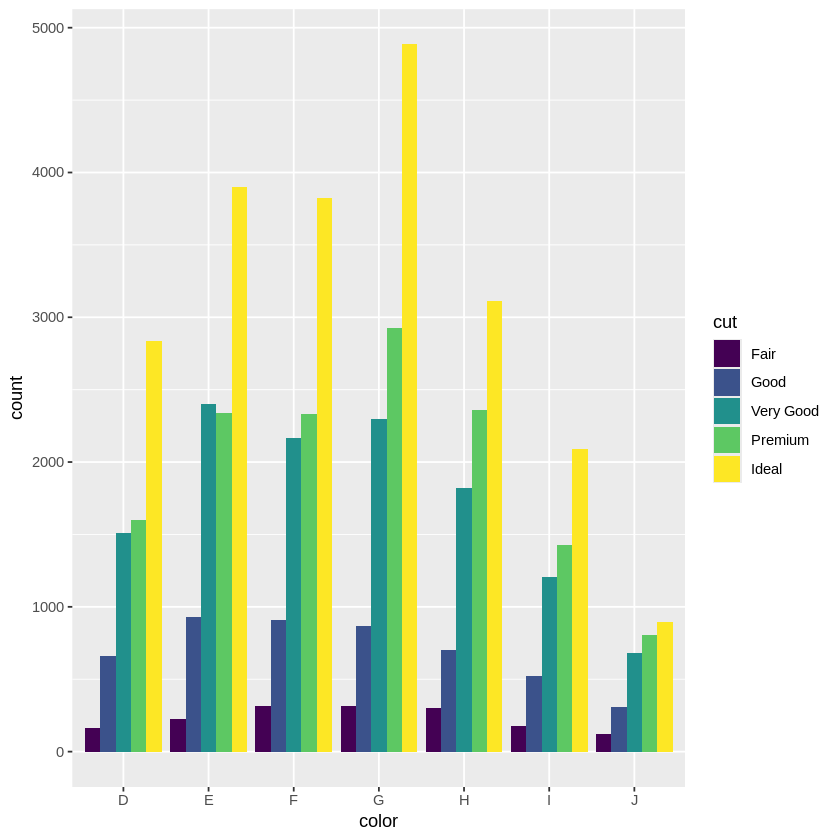

In [67]:
dplot + geom_bar(position = "dodge")

## <a name="quest9">Question 9</a>

---

Suppose we want to determine which color has the highest proportion of good cut diamonds?  Which plot is most effective at presenting the data so we can most readily answer this question?

<br>  


### <a name="sol9">Solution to Question 9</a>

---



<br>  
<br>  


# <a name="jittering"> Jittering Data</a>

---

Sometimes, data values/information overlap, which makes interpreting the
plot more difficult. In that case, it can be useful to “jitter” the data
so that the values/information are not overlapping. The data are not
technically as accurate, but the large-scale distribution of the data is
easier to interpret.

The `Galton` data set in the **HistData** package (Friendly 2021)
includes 928 observations of 2 variables. The variables are:

-   `parent`: a `numeric` variable indicating the average height of a
    child’s mother and father (in).
-   `child`: a `numeric` variable indicating the height of each child
    (in).



In [ ]:
# load ggplot2 each time you start a new R session
#library(ggplot2)

# install and load the palmerpenguins package each time you start a new R session
#install.packages(c("ggthemes", "palmerpenguins", "HistData"))
#library(palmerpenguins)  # used for penguins data frame
#library(ggthemes)  # used for scale_color_colorblind function

install.packages("HistData")
library(HistData)  # used for Galton data frame

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [77]:
data(Galton, package = "HistData")
str(Galton)

'data.frame':	928 obs. of  2 variables:
 $ parent: num  70.5 68.5 65.5 64.5 64 67.5 67.5 67.5 66.5 66.5 ...
 $ child : num  61.7 61.7 61.7 61.7 61.7 62.2 62.2 62.2 62.2 62.2 ...


The data are rounded to the nearest 0.1 inch. Additional information can
be found by running `?Galton`. Unfortunately, the rounding of the data values leads to overplotting (many points being stacked on top of each other). Below, we load the `Galton` data and create a scatter plot of child height versus parents’ average height.

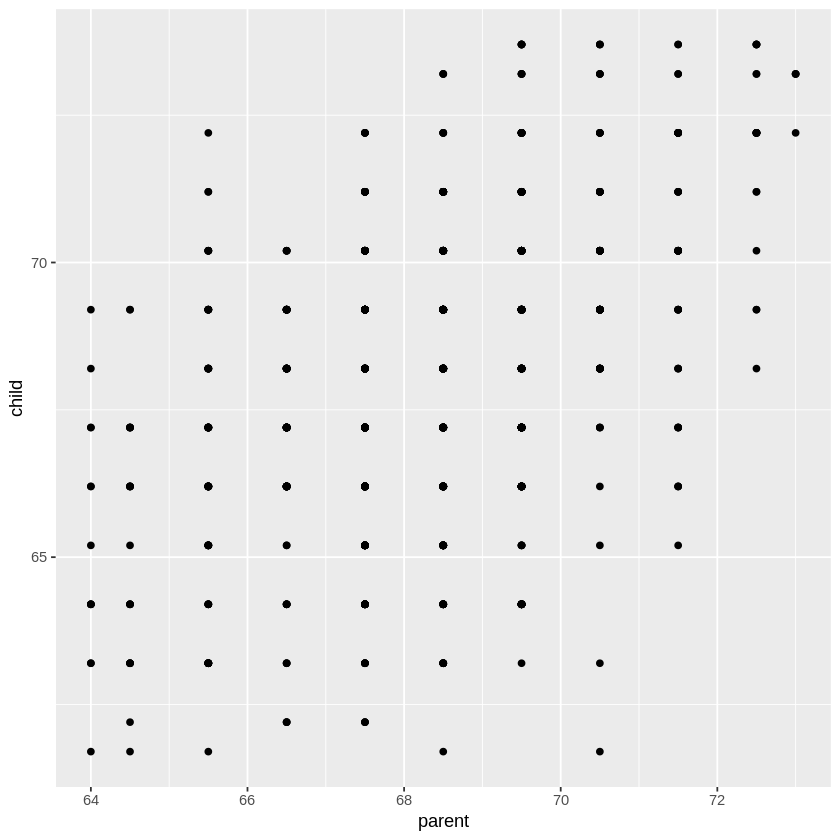

In [76]:
ggplot(Galton, aes(x = parent, y = child)) +
  geom_point()

There is a lot of overplotting in this graphic. We use the `position`
argument to `jitter` the data to make the overall distribution clearer.
There’s not a lot of information gain from jittering the data in this
particular example, but we can see that there are more observations in
the central part of the plot.

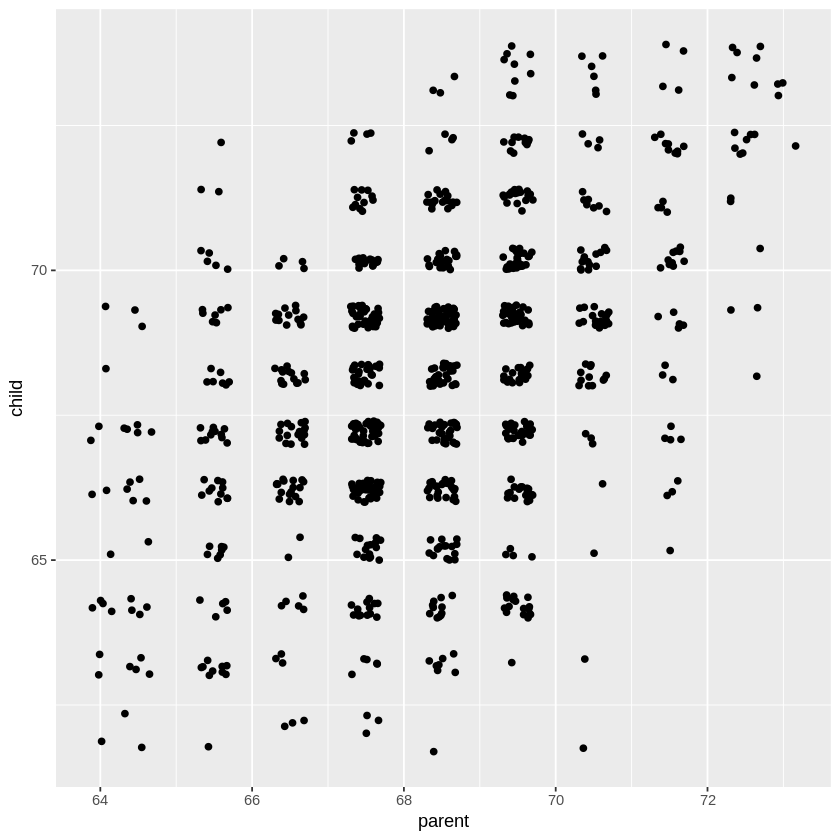

In [78]:
ggplot(Galton, aes(x = parent, y = child)) +
  geom_point(position = "jitter")

# <a name="coord-sys">Coordinate Systems</a>

---

A coordinate system is used to define the position of coordinates
relative to one another.

By default, `ggplot2` uses the [Cartesian coordinate system](https://en.wikipedia.org/wiki/Cartesian_coordinate_system). The Cartesian coordinate system treats coordinates as points on a flat plane, which is how humans tend to think about coordinates in relationship to one another.

Other coordinate systems are commonly used for maps because the points
are actually on an ellipsoidal object (the Earth!), which complicates
their relationship.

We do not discuss coordinate systems in detail here. The only coordinate
system we mention is the “flipped” coordinate system
(`coord_flip`), which flips the x and y axes. This is useful for
rotating objects in a plot. Consider the parallel boxplots examples
below.

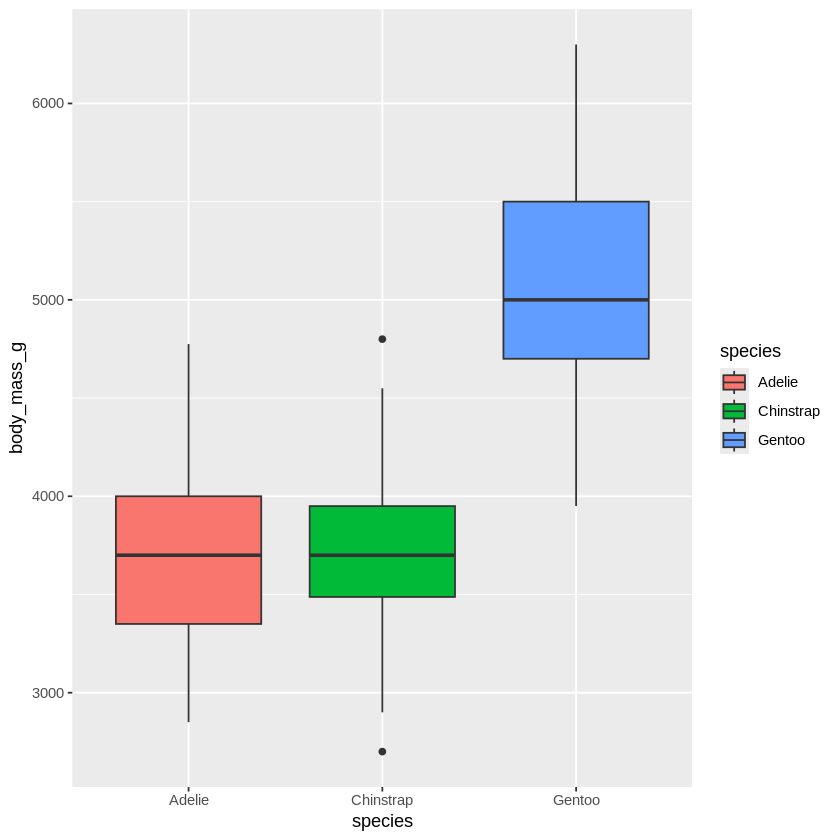

In [ ]:
ggplot(penguins, aes(x = species, y = body_mass_g, fill = species)) +
  geom_boxplot()

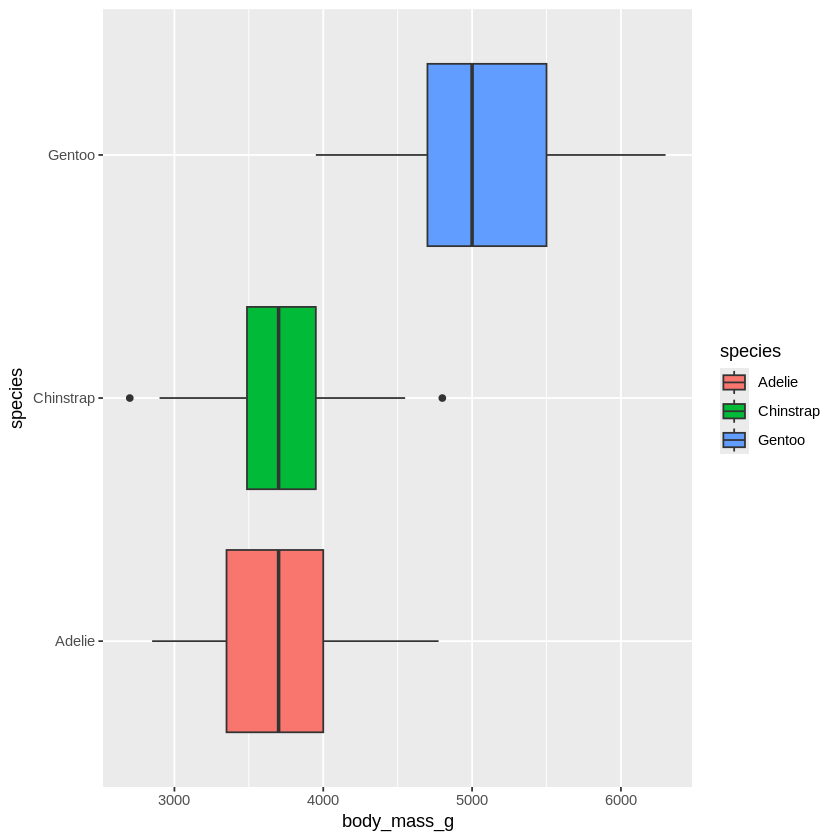

In [79]:
ggplot(penguins, aes(x = species, y = body_mass_g, fill = species)) +
  geom_boxplot() +
  coord_flip()  # flips the x and y axes

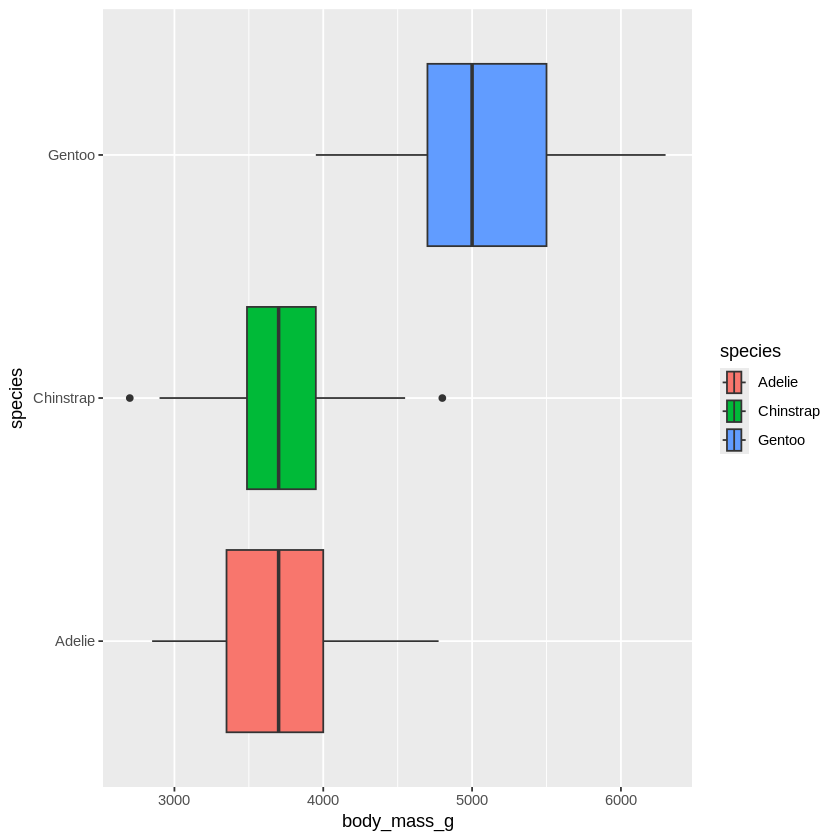

In [ ]:
# manually switching x and y aesthetics results in same plot
ggplot(penguins, aes(x = body_mass_g, y = species, fill = species)) +
  geom_boxplot()

# <a name="appendix-ggplot2">Appendix: An Overview of `ggplot2`</a>

---

<br>  

See [Module 05 Getting Started with `ggplot2`](https://githubtocolab.com/CU-Denver-MathStats-OER/Data-Wrangling-and-Visualization/blob/main/05-Getting-Started-with-ggplot2.ipynb) for more details.

<br>  


There are 4 main components needed to produce a graphic using
**ggplot2**.

1.  A <font color="dodgerblue">**data frame**</font> containing your data.
    -   Each column should be a variable and each row should be an
        observation of data.
2.  A <font color="dodgerblue">**`ggplot` object**</font>.
    -   This is initialized using the `ggplot` function.
3.  An <font color="dodgerblue">**aesthetic mapping**</font> indicates what role a variable plays in the plot. For example:
    -   Which variable (if any) is plotted on the $x$-axis? Which variable (if any) is plotted on the $y$-axis?
    - Which variable controls the color of features?
    - Which variable controls the size of features?
4.  A <font color="dodgerblue">**geometric object**</font>. These are called *geoms* for short.
    -   They indicate the type of plot that is desired.
    -   Histogram, density, boxplot, are some common examples of geoms.
        shape.
    -   They also indicate the geometric object used to visualize the data.
    -   Points, lines, or polygons are some examples of geoms to name a few.


<!-- $x$ -->

In [*R for Data Science*](https://r4ds.hadley.nz/data-visualize), Wickham and Grolemund (2023) provide the following template for creating graphics using `ggplot2`:

    ggplot(
      data = <DATA>,
      mapping = aes(<MAPPINGS>)
      ) +
      <GEOM_FUNCTION>()

`<DATA>`, `<MAPPINGS>`, and `<GEOM_FUNCTION>` are placeholders that you
replace with the data frame, aesthetic mappings, and geometric object, respectively, you want to use in your specific plot.



## <a name="geoms">A Dictionary of Common Geometric Objects</a>

---

There are many geometric objects available in **ggplot2**. A complete
list may be (currently) found at <https://ggplot2.tidyverse.org/reference/>. A partial list of geometric objects that are frequently used are found below.


| dimensionality | geometry | purpose  |
|----------------|----------|----------|
| 1d | `geom_bar` | Draws a bar chart.  |
| 1d | `geom_density` | Draws a density plot. |
| 1d | `geom_histogram`    | Draws a histogram. |
| 1d | `geom_boxplot`  | Draws a boxplot.  |
| 1d | `geom_violin`   | Draws a violin plot.  |
| 1d | `geom_qq`       | Draws a quantile-quantile plot.  |
| 2d | `geom_point`    | Draws points. Used for scatter plots.  |
| 2d | `geom_path`, `geom_line` | Connects observations. Used for line plots. |
| 2d | `geom_segment`  | Draws straight lines between points.  |
| 2d | `geom_curve`    | Draws curved lines between points.  |
| 2d | `geom_smooth`   | Draws a ‘smooth’ fitted model of the data. |
| 2d | `geom_density2d`  | Draws 2d contours of density estimate for two variables.  |
| 2d  | `geom_density2d_filled` | Draws 2d contours of density estimate for two variables with colors. |
| 3d | `geom_contour`  | Draws 2d contours of 3d data. |
| 3d | `geom_contour_filled`  | Draws 2d contours of 3d data (colored). |
| NA | `geom_abline`, `geom_hline`, `geom_vline` | Draws diagonal, horizontal, and vertical lines. |

Table 1: Common geometries provided by **ggplot2**.



## <a name="common-aes">A Dictionary of Common Aesthetic Mappings</a>

---

Aesthetic mappings are unique to each geometric object. Some of the most
common ones that show up in many geoms are provided below.

| aesthetic | purpose |
|-----------|---------|
| `x` | Controls the x-variable in the plot. |
| `y` | Controls the y-variable in the plot. |
| `alpha` | Controls the transparency of the object. |
| `color`, `colour` | Controls the colors of the object. |
| `fill` | Controls the color of the interior of an object. |
| `group` | Controls how the data are grouped. |
| `linetype` | Controls the type of line used to draw the object. |
| `size` | Controls the size of the drawn object. |
| `shape` | Controls the shape of the object. |

Table 2: Common aesthetics provided by **ggplot2**.



## <a name="CC License">Creative Commons License Information</a>
---

![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

Materials created by the [Department of Mathematical and Statistical Sciences at the University of Colorado Denver](https://github.com/CU-Denver-MathStats-OER/)
and is licensed under a [Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-nc-sa/4.0/).